# Object Counting on Amazon Bin Image Dataset

## Background

Object recognition is a key component for machine learning domain.

## Datasets: Amazon Bin Image Dataset

### Documentation
- https://github.com/awslabs/open-data-docs/tree/main/docs/aft-vbi-pds

### Download
- https://registry.opendata.aws/amazon-bin-imagery/
- https://github.com/awslabs/open-data-registry/blob/main/datasets/amazon-bin-imagery.yaml

### License

> Creative Commons Attribution-NonCommercial-ShareAlike 3.0 United States (CC BY-NC-SA 3.0 US) https://creativecommons.org/licenses/by-nc-sa/3.0/us/

### Description

This dataset has many images and the corresponding medadata.

> The Amazon Bin Image Dataset contains over 500,000 images and metadata from bins of a pod in an operating Amazon Fulfillment Center. The bin images in this dataset are captured as robot units carry pods as part of normal Amazon Fulfillment Center operations.

### Metadata

Metadata files are JSON files containing `image_fname` and `EXPECTED_QUANTITY` fields that can be useful in this counting capstone project.

In [49]:
!aws s3 cp --no-sign-request s3://aft-vbi-pds/metadata/1.json -
{
    "BIN_FCSKU_DATA": {},
    "EXPECTED_QUANTITY": 0,
    "image_fname": "1.jpg"
}

{
    "BIN_FCSKU_DATA": {},
    "EXPECTED_QUANTITY": 0,
    "image_fname": "1.jpg"
}

{'BIN_FCSKU_DATA': {}, 'EXPECTED_QUANTITY': 0, 'image_fname': '1.jpg'}

Dataset contains 536,434 **JSON** metadata files.

In [ ]:
!aws s3 ls --no-sign-request s3://aft-vbi-pds/metadata/ --summarize > metadatalist

In [55]:
!head -n2 metadatalist

2016-06-21 18:27:38          0 
2017-01-13 15:06:53       2472 00001.json


In [56]:
!tail metadatalist

2017-01-13 17:59:16       4529 99993.json
2017-01-13 17:59:16       4529 99994.json
2017-01-13 17:59:16       3740 99995.json
2017-01-13 17:59:16        864 99996.json
2017-01-13 17:59:16       2132 99997.json
2017-01-13 17:59:16       2770 99998.json
2017-01-13 17:59:16       1658 99999.json

Total Objects: 536435
   Total Size: 1098414519


### Data Size

It's useful to check the datasize to get the idea of data processing cost. The dataset has 536,434 **JPEG** files in total in align with metadata files.

In [ ]:
!aws s3 ls --no-sign-request s3://aft-vbi-pds/bin-images/ --summarize > list

In [52]:
!head -n2 list

2016-06-17 10:28:56          0 
2017-01-13 14:47:53      45769 00001.jpg


In [53]:
!tail list

2017-01-13 18:03:14      80192 99993.jpg
2017-01-13 18:03:14     104201 99994.jpg
2017-01-13 18:03:14     103665 99995.jpg
2017-01-13 18:03:14      58212 99996.jpg
2017-01-13 18:03:14      39300 99997.jpg
2017-01-13 18:03:14      36076 99998.jpg
2017-01-13 18:03:14      35218 99999.jpg

Total Objects: 536435
   Total Size: 30466377489


### File Names

The dataset considers `1.jpg` and `00001.jpg` differently like the following.

```
$ aws s3 ls --no-sign-request s3://aft-vbi-pds/bin-images/1.jpg
2016-06-17 10:30:24      56301 1.jpg

$ aws s3 ls --no-sign-request s3://aft-vbi-pds/bin-images/00001.jpg
2017-01-13 14:47:53      45769 00001.jpg
```

I categorized the files according to the naming scheme.

536,434 images:
- **1~4 digit**: `1.jpg` ~ `1200.jpg`: 1200
- **5-digit**: `00001.jpg` ~ `99999.jpg`: 99,999
- **6-digit**: `100000.jpg` ~ `535234.jpg`: 435,235

## Exploratory Data Analysis

### Group 1 with 1~4 digit in file names

In [26]:
import boto3
from tqdm import tqdm

def download_metadata():
    s3_client = boto3.client('s3')

    directory = 'metadata'
    if not os.path.exists(directory):
        os.makedirs(directory)
    for i in tqdm(range(1, 1201)):
        file_name = "%s.json" % i
        s3_client.download_file('aft-vbi-pds', os.path.join(directory, file_name), os.path.join(directory, file_name))

download_metadata()

100%|██████████| 1200/1200 [01:27<00:00, 13.72it/s]


In [36]:
import json
import pandas as pd

values = []
directory = "metadata"
for i in range(1, 1201):
    filename = "%s/%s.json" % (directory, i)
    with open(filename, "r") as f:
        data = json.load(f)
        n = data['EXPECTED_QUANTITY']
        values.append(n)

df = pd.DataFrame({'n': values})
df

,n
0,0
1,0
2,0
3,0
4,0
...,...
1195,5
1196,5
1197,5
1198,5


In [37]:
df.describe()

,n
count,1200.000000
mean,2.500000
std,1.708537
min,0.000000
25%,1.000000
50%,2.500000
75%,4.000000
max,5.000000


array([[<AxesSubplot:title={'center':'n'}>]], dtype=object)

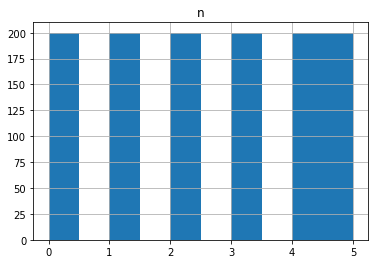

In [38]:
df.hist()

### Group 2 with 5 digits in file name

In [41]:
!df -h .

Filesystem      Size  Used Avail Use% Mounted on
/dev/xvdf       4.9G  643M  4.0G  14% /home/ec2-user/SageMaker


In [ ]:
import boto3
from tqdm import tqdm

def download_metadata():
    s3_client = boto3.client('s3')

    directory = 'metadata'
    if not os.path.exists(directory):
        os.makedirs(directory)
    for i in tqdm(range(1, 100000)):
        file_name = "%05d.json" % i
        s3_client.download_file('aft-vbi-pds', os.path.join(directory, file_name), os.path.join(directory, file_name))

download_metadata()

In [ ]:
import json
import pandas as pd

values = []
directory = "metadata"
for i in range(1, 100000):
    filename = "%s/%05d.json" % (directory, i)
    with open(filename, "r") as f:
        data = json.load(f)
        n = data['EXPECTED_QUANTITY']
        values.append(n)

df = pd.DataFrame({'n': values})
df.to_csv("00001-99999.csv", index=False)

In [44]:
df = pd.read_csv("00001-99999.csv")
df

,n
0,12
1,17
2,16
3,5
4,4
...,...
99994,5
99995,2
99996,16
99997,5


In [45]:
df.describe()

,n
count,99999.000000
mean,5.125321
std,4.758112
min,0.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,209.000000


array([[<AxesSubplot:title={'center':'n'}>]], dtype=object)

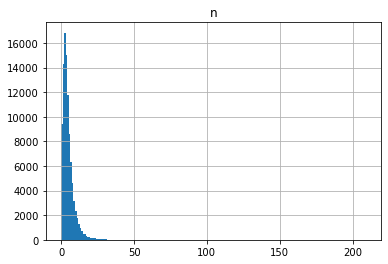

In [46]:
df.hist(bins=200)

### Group with the given file list

In [62]:
import json
with open('file_list.json', 'r') as f:
    d=json.load(f)
for k, v in d.items():
    print("%s has %d items" % (k, len(v)))

1 has 1228 items
2 has 2299 items
3 has 2666 items
4 has 2373 items
5 has 1875 items


### EDA Conclusion
In general, `Group 1` is evenly distributed but the size is too small because it has only 200 images per group. `Group 2` provides more realistic dataset but the distribution is skewed. `Group 3` is too large for now. `file_list.json` has more evenly distributed files. `file_list.json` is a good start to train the baseline model.

- 1~4 digit: 1.jpg ~ 1200.jpg: 1200
- 5-digit: 00001.jpg ~ 99999.jpg: 99,999
- 6-digit: 100000.jpg ~ 535234.jpg: 435,235
- `file_list.json`: 10,441

## Data Preparation (Sampling based on `file_list.json`)

### Split data into train/valid/test = 8:1:1

In [75]:
import json
import random

with open('file_list.json', 'r') as f:
    d=json.load(f)

train = {}
valid = {}
test = {}
for k, v in d.items():
    l = len(v)
    print("%s has %d items" % (k, l))
    random.shuffle(v)
    i = (int)(0.8 * l)
    j = (int)(0.9 * l)
    train[k] = v[:i]
    valid[k] = v[i:j]
    test[k] = v[j:]
    print("%s:%s:%s" % (len(train[k]), len(valid[k]), len(test[k])))
    
with open('train.json', 'w') as f:
    json.dump(train, f)
with open('valid.json', 'w') as f:
    json.dump(valid, f)
with open('test.json', 'w') as f:
    json.dump(test, f)

1 has 1228 items
982:123:123
2 has 2299 items
1839:230:230
3 has 2666 items
2132:267:267
4 has 2373 items
1898:237:238
5 has 1875 items
1500:187:188


### Download data

Downloads training data and arranges it in subfolders. Each of these subfolders contain images where the number of objects is equal to the name of the folder.

```
$ tree .
.
├── test
│   ├── 1
│   ├── 2
│   ├── 3
│   ├── 4
│   └── 5
├── train
│   ├── 1
│   ├── 2
│   ├── 3
│   ├── 4
│   └── 5
└── valid
    ├── 1
    ├── 2
    ├── 3
    ├── 4
    └── 5
```

In [79]:
import os
import json
import boto3
from tqdm import tqdm

def download_and_arrange_data(folder):
    s3_client = boto3.client('s3')

    with open(folder + '.json', 'r') as f:
        d=json.load(f)

    for k, v in d.items():
        print(f"Downloading Images with {k} objects")
        directory=os.path.join(folder, k)
        if not os.path.exists(directory):
            os.makedirs(directory)
        for file_path in tqdm(v):
            file_name=os.path.basename(file_path).split('.')[0]+'.jpg'
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', file_name),
                             os.path.join(directory, file_name))

download_and_arrange_data('train')
#download_and_arrange_data('valid')
#download_and_arrange_data('test')

  0%|          | 0/982 [00:00<?, ?it/s]

  0%|          | 2/1839 [00:00<01:48, 16.98it/s]

  0%|          | 2/2132 [00:00<02:09, 16.44it/s]

  0%|          | 2/1898 [00:00<02:10, 14.55it/s]

  0%|          | 1/1500 [00:00<02:38,  9.48it/s]

100%|██████████| 1500/1500 [01:58<00:00, 12.66it/s]


In [80]:
!ls -al train valid test

test:
total 52
drwxrwxr-x 7 ec2-user ec2-user  4096 Apr 20 23:58 .
drwxrwxr-x 8 ec2-user ec2-user  4096 Apr 21 00:15 ..
drwxrwxr-x 2 ec2-user ec2-user  4096 Apr 20 23:57 1
drwxrwxr-x 2 ec2-user ec2-user 12288 Apr 20 23:57 2
drwxrwxr-x 2 ec2-user ec2-user 12288 Apr 20 23:57 3
drwxrwxr-x 2 ec2-user ec2-user 12288 Apr 20 23:58 4
drwxrwxr-x 2 ec2-user ec2-user  4096 Apr 20 23:58 5

train:
total 284
drwxrwxr-x 7 ec2-user ec2-user  4096 Apr 21 00:12 .
drwxrwxr-x 8 ec2-user ec2-user  4096 Apr 21 00:15 ..
drwxrwxr-x 2 ec2-user ec2-user 36864 Apr 21 00:04 1
drwxrwxr-x 2 ec2-user ec2-user 65536 Apr 21 00:07 2
drwxrwxr-x 2 ec2-user ec2-user 69632 Apr 21 00:10 3
drwxrwxr-x 2 ec2-user ec2-user 69632 Apr 21 00:12 4
drwxrwxr-x 2 ec2-user ec2-user 40960 Apr 21 00:14 5

valid:
total 52
drwxrwxr-x 7 ec2-user ec2-user  4096 Apr 21 00:02 .
drwxrwxr-x 8 ec2-user ec2-user  4096 Apr 21 00:15 ..
drwxrwxr-x 2 ec2-user ec2-user  4096 Apr 20 23:59 1
drwxrwxr-x 2 ec2-user ec2-user 12288 Apr 20 23:59 2
drwxrwxr-x 

In [20]:
!du -h train_data

140M	train_data/4
108M	train_data/5
66M	train_data/1
134M	train_data/2
161M	train_data/3
607M	train_data


In [19]:
!aws s3 sync train_data s3://amazonbin/train_data

upload: train_data/1/00009.jpg to s3://amazonbin/train_data/1/00009.jpg              
upload: train_data/1/00100.jpg to s3://amazonbin/train_data/1/00100.jpg                
upload: train_data/1/00024.jpg to s3://amazonbin/train_data/1/00024.jpg                
upload: train_data/1/00152.jpg to s3://amazonbin/train_data/1/00152.jpg              
upload: train_data/1/00148.jpg to s3://amazonbin/train_data/1/00148.jpg              
upload: train_data/1/00232.jpg to s3://amazonbin/train_data/1/00232.jpg              
upload: train_data/1/00035.jpg to s3://amazonbin/train_data/1/00035.jpg               
upload: train_data/1/00048.jpg to s3://amazonbin/train_data/1/00048.jpg               
upload: train_data/1/00214.jpg to s3://amazonbin/train_data/1/00214.jpg               
upload: train_data/1/00014.jpg to s3://amazonbin/train_data/1/00014.jpg               
upload: train_data/1/00229.jpg to s3://amazonbin/train_data/1/00229.jpg               
upload: train_data/1/00084.jpg to s3://amazon

upload: train_data/1/01308.jpg to s3://amazonbin/train_data/1/01308.jpg              
upload: train_data/1/01303.jpg to s3://amazonbin/train_data/1/01303.jpg              
upload: train_data/1/01304.jpg to s3://amazonbin/train_data/1/01304.jpg              
upload: train_data/1/01320.jpg to s3://amazonbin/train_data/1/01320.jpg              
upload: train_data/1/01288.jpg to s3://amazonbin/train_data/1/01288.jpg              
upload: train_data/1/01465.jpg to s3://amazonbin/train_data/1/01465.jpg              
upload: train_data/1/01377.jpg to s3://amazonbin/train_data/1/01377.jpg              
upload: train_data/1/01437.jpg to s3://amazonbin/train_data/1/01437.jpg              
upload: train_data/1/01360.jpg to s3://amazonbin/train_data/1/01360.jpg              
upload: train_data/1/01357.jpg to s3://amazonbin/train_data/1/01357.jpg              
upload: train_data/1/01513.jpg to s3://amazonbin/train_data/1/01513.jpg              
upload: train_data/1/01498.jpg to s3://amazonbin/train

upload: train_data/1/02684.jpg to s3://amazonbin/train_data/1/02684.jpg              
upload: train_data/1/02687.jpg to s3://amazonbin/train_data/1/02687.jpg              
upload: train_data/1/02758.jpg to s3://amazonbin/train_data/1/02758.jpg              
upload: train_data/1/02746.jpg to s3://amazonbin/train_data/1/02746.jpg              
upload: train_data/1/02667.jpg to s3://amazonbin/train_data/1/02667.jpg              
upload: train_data/1/02770.jpg to s3://amazonbin/train_data/1/02770.jpg              
upload: train_data/1/02821.jpg to s3://amazonbin/train_data/1/02821.jpg               
upload: train_data/1/02826.jpg to s3://amazonbin/train_data/1/02826.jpg               
upload: train_data/1/02834.jpg to s3://amazonbin/train_data/1/02834.jpg               
upload: train_data/1/02707.jpg to s3://amazonbin/train_data/1/02707.jpg               
upload: train_data/1/02785.jpg to s3://amazonbin/train_data/1/02785.jpg               
upload: train_data/1/02776.jpg to s3://amazonbin/

upload: train_data/1/04067.jpg to s3://amazonbin/train_data/1/04067.jpg               
upload: train_data/1/04013.jpg to s3://amazonbin/train_data/1/04013.jpg               
upload: train_data/1/03996.jpg to s3://amazonbin/train_data/1/03996.jpg               
upload: train_data/1/04028.jpg to s3://amazonbin/train_data/1/04028.jpg               
upload: train_data/1/04063.jpg to s3://amazonbin/train_data/1/04063.jpg               
upload: train_data/1/04040.jpg to s3://amazonbin/train_data/1/04040.jpg               
upload: train_data/1/04079.jpg to s3://amazonbin/train_data/1/04079.jpg               
upload: train_data/1/04097.jpg to s3://amazonbin/train_data/1/04097.jpg               
upload: train_data/1/03994.jpg to s3://amazonbin/train_data/1/03994.jpg               
upload: train_data/1/04133.jpg to s3://amazonbin/train_data/1/04133.jpg               
upload: train_data/1/04042.jpg to s3://amazonbin/train_data/1/04042.jpg               
upload: train_data/1/04158.jpg to s3://amaz

upload: train_data/1/05275.jpg to s3://amazonbin/train_data/1/05275.jpg               
upload: train_data/1/05295.jpg to s3://amazonbin/train_data/1/05295.jpg               
upload: train_data/1/05310.jpg to s3://amazonbin/train_data/1/05310.jpg               
upload: train_data/1/05353.jpg to s3://amazonbin/train_data/1/05353.jpg               
upload: train_data/1/05316.jpg to s3://amazonbin/train_data/1/05316.jpg               
upload: train_data/1/05306.jpg to s3://amazonbin/train_data/1/05306.jpg               
upload: train_data/1/05388.jpg to s3://amazonbin/train_data/1/05388.jpg               
upload: train_data/1/05394.jpg to s3://amazonbin/train_data/1/05394.jpg               
upload: train_data/1/05397.jpg to s3://amazonbin/train_data/1/05397.jpg               
upload: train_data/1/05317.jpg to s3://amazonbin/train_data/1/05317.jpg               
upload: train_data/1/05364.jpg to s3://amazonbin/train_data/1/05364.jpg               
upload: train_data/1/05371.jpg to s3://amaz

upload: train_data/1/06752.jpg to s3://amazonbin/train_data/1/06752.jpg               
upload: train_data/1/06703.jpg to s3://amazonbin/train_data/1/06703.jpg               
upload: train_data/1/06749.jpg to s3://amazonbin/train_data/1/06749.jpg               
upload: train_data/1/06624.jpg to s3://amazonbin/train_data/1/06624.jpg               
upload: train_data/1/06678.jpg to s3://amazonbin/train_data/1/06678.jpg               
upload: train_data/1/06761.jpg to s3://amazonbin/train_data/1/06761.jpg               
upload: train_data/1/06769.jpg to s3://amazonbin/train_data/1/06769.jpg               
upload: train_data/1/06764.jpg to s3://amazonbin/train_data/1/06764.jpg               
upload: train_data/1/06715.jpg to s3://amazonbin/train_data/1/06715.jpg               
upload: train_data/1/06797.jpg to s3://amazonbin/train_data/1/06797.jpg               
upload: train_data/1/06793.jpg to s3://amazonbin/train_data/1/06793.jpg               
upload: train_data/1/06805.jpg to s3://amaz

upload: train_data/1/07732.jpg to s3://amazonbin/train_data/1/07732.jpg               
upload: train_data/1/07764.jpg to s3://amazonbin/train_data/1/07764.jpg               
upload: train_data/1/07763.jpg to s3://amazonbin/train_data/1/07763.jpg               
upload: train_data/1/07735.jpg to s3://amazonbin/train_data/1/07735.jpg               
upload: train_data/1/07666.jpg to s3://amazonbin/train_data/1/07666.jpg               
upload: train_data/1/07702.jpg to s3://amazonbin/train_data/1/07702.jpg               
upload: train_data/1/07815.jpg to s3://amazonbin/train_data/1/07815.jpg               
upload: train_data/1/07786.jpg to s3://amazonbin/train_data/1/07786.jpg               
upload: train_data/1/07902.jpg to s3://amazonbin/train_data/1/07902.jpg               
upload: train_data/1/07905.jpg to s3://amazonbin/train_data/1/07905.jpg               
upload: train_data/1/07903.jpg to s3://amazonbin/train_data/1/07903.jpg               
upload: train_data/1/07795.jpg to s3://amaz

upload: train_data/1/08884.jpg to s3://amazonbin/train_data/1/08884.jpg               
upload: train_data/1/08928.jpg to s3://amazonbin/train_data/1/08928.jpg               
upload: train_data/1/08909.jpg to s3://amazonbin/train_data/1/08909.jpg               
upload: train_data/1/08963.jpg to s3://amazonbin/train_data/1/08963.jpg               
upload: train_data/1/08969.jpg to s3://amazonbin/train_data/1/08969.jpg               
upload: train_data/1/08945.jpg to s3://amazonbin/train_data/1/08945.jpg               
upload: train_data/1/08966.jpg to s3://amazonbin/train_data/1/08966.jpg               
upload: train_data/1/08961.jpg to s3://amazonbin/train_data/1/08961.jpg               
upload: train_data/1/09003.jpg to s3://amazonbin/train_data/1/09003.jpg               
upload: train_data/1/08913.jpg to s3://amazonbin/train_data/1/08913.jpg               
upload: train_data/1/09027.jpg to s3://amazonbin/train_data/1/09027.jpg               
upload: train_data/1/09031.jpg to s3://amaz

upload: train_data/1/100160.jpg to s3://amazonbin/train_data/1/100160.jpg             
upload: train_data/1/100183.jpg to s3://amazonbin/train_data/1/100183.jpg             
upload: train_data/1/100191.jpg to s3://amazonbin/train_data/1/100191.jpg             
upload: train_data/1/100186.jpg to s3://amazonbin/train_data/1/100186.jpg             
upload: train_data/1/100049.jpg to s3://amazonbin/train_data/1/100049.jpg             
upload: train_data/1/100076.jpg to s3://amazonbin/train_data/1/100076.jpg             
upload: train_data/1/100012.jpg to s3://amazonbin/train_data/1/100012.jpg             
upload: train_data/1/100196.jpg to s3://amazonbin/train_data/1/100196.jpg             
upload: train_data/1/100100.jpg to s3://amazonbin/train_data/1/100100.jpg             
upload: train_data/1/100198.jpg to s3://amazonbin/train_data/1/100198.jpg             
upload: train_data/1/100312.jpg to s3://amazonbin/train_data/1/100312.jpg             
upload: train_data/1/100220.jpg to s3://ama

upload: train_data/1/101159.jpg to s3://amazonbin/train_data/1/101159.jpg              
upload: train_data/1/101219.jpg to s3://amazonbin/train_data/1/101219.jpg              
upload: train_data/1/101161.jpg to s3://amazonbin/train_data/1/101161.jpg              
upload: train_data/1/101222.jpg to s3://amazonbin/train_data/1/101222.jpg              
upload: train_data/1/101228.jpg to s3://amazonbin/train_data/1/101228.jpg              
upload: train_data/1/101166.jpg to s3://amazonbin/train_data/1/101166.jpg              
upload: train_data/1/101282.jpg to s3://amazonbin/train_data/1/101282.jpg              
upload: train_data/1/101182.jpg to s3://amazonbin/train_data/1/101182.jpg              
upload: train_data/1/101247.jpg to s3://amazonbin/train_data/1/101247.jpg              
upload: train_data/1/101276.jpg to s3://amazonbin/train_data/1/101276.jpg              
upload: train_data/1/101238.jpg to s3://amazonbin/train_data/1/101238.jpg              
upload: train_data/1/101320.jpg 

upload: train_data/1/102321.jpg to s3://amazonbin/train_data/1/102321.jpg              
upload: train_data/1/102329.jpg to s3://amazonbin/train_data/1/102329.jpg              
upload: train_data/1/102312.jpg to s3://amazonbin/train_data/1/102312.jpg              
upload: train_data/1/102394.jpg to s3://amazonbin/train_data/1/102394.jpg              
upload: train_data/1/102342.jpg to s3://amazonbin/train_data/1/102342.jpg              
upload: train_data/1/10244.jpg to s3://amazonbin/train_data/1/10244.jpg                
upload: train_data/1/102398.jpg to s3://amazonbin/train_data/1/102398.jpg              
upload: train_data/1/102384.jpg to s3://amazonbin/train_data/1/102384.jpg              
upload: train_data/1/102456.jpg to s3://amazonbin/train_data/1/102456.jpg              
upload: train_data/1/102279.jpg to s3://amazonbin/train_data/1/102279.jpg              
upload: train_data/1/102470.jpg to s3://amazonbin/train_data/1/102470.jpg              
upload: train_data/1/102480.jpg 

upload: train_data/1/103610.jpg to s3://amazonbin/train_data/1/103610.jpg              
upload: train_data/1/103614.jpg to s3://amazonbin/train_data/1/103614.jpg              
upload: train_data/1/103741.jpg to s3://amazonbin/train_data/1/103741.jpg              
upload: train_data/1/103734.jpg to s3://amazonbin/train_data/1/103734.jpg              
upload: train_data/1/103681.jpg to s3://amazonbin/train_data/1/103681.jpg              
upload: train_data/1/103740.jpg to s3://amazonbin/train_data/1/103740.jpg              
upload: train_data/1/10365.jpg to s3://amazonbin/train_data/1/10365.jpg                
upload: train_data/1/10378.jpg to s3://amazonbin/train_data/1/10378.jpg                
upload: train_data/1/103766.jpg to s3://amazonbin/train_data/1/103766.jpg              
upload: train_data/1/103840.jpg to s3://amazonbin/train_data/1/103840.jpg              
upload: train_data/1/103778.jpg to s3://amazonbin/train_data/1/103778.jpg              
upload: train_data/1/10380.jpg t

upload: train_data/1/104678.jpg to s3://amazonbin/train_data/1/104678.jpg              
upload: train_data/1/104727.jpg to s3://amazonbin/train_data/1/104727.jpg              
upload: train_data/1/104683.jpg to s3://amazonbin/train_data/1/104683.jpg              
upload: train_data/1/104716.jpg to s3://amazonbin/train_data/1/104716.jpg              
upload: train_data/1/104721.jpg to s3://amazonbin/train_data/1/104721.jpg              
upload: train_data/1/104714.jpg to s3://amazonbin/train_data/1/104714.jpg              
upload: train_data/1/104663.jpg to s3://amazonbin/train_data/1/104663.jpg              
upload: train_data/1/104730.jpg to s3://amazonbin/train_data/1/104730.jpg              
upload: train_data/1/10475.jpg to s3://amazonbin/train_data/1/10475.jpg                
upload: train_data/1/104852.jpg to s3://amazonbin/train_data/1/104852.jpg              
upload: train_data/1/104798.jpg to s3://amazonbin/train_data/1/104798.jpg              
upload: train_data/1/104791.jpg 

upload: train_data/2/00428.jpg to s3://amazonbin/train_data/2/00428.jpg                
upload: train_data/2/00318.jpg to s3://amazonbin/train_data/2/00318.jpg                
upload: train_data/2/00449.jpg to s3://amazonbin/train_data/2/00449.jpg                
upload: train_data/2/00424.jpg to s3://amazonbin/train_data/2/00424.jpg                
upload: train_data/2/00167.jpg to s3://amazonbin/train_data/2/00167.jpg                
upload: train_data/2/00510.jpg to s3://amazonbin/train_data/2/00510.jpg                
upload: train_data/2/00435.jpg to s3://amazonbin/train_data/2/00435.jpg                
upload: train_data/2/00479.jpg to s3://amazonbin/train_data/2/00479.jpg                
upload: train_data/2/00473.jpg to s3://amazonbin/train_data/2/00473.jpg                
upload: train_data/2/00458.jpg to s3://amazonbin/train_data/2/00458.jpg                
upload: train_data/2/00402.jpg to s3://amazonbin/train_data/2/00402.jpg                
upload: train_data/2/00512.jpg t

upload: train_data/2/01012.jpg to s3://amazonbin/train_data/2/01012.jpg                
upload: train_data/2/01064.jpg to s3://amazonbin/train_data/2/01064.jpg                
upload: train_data/2/01076.jpg to s3://amazonbin/train_data/2/01076.jpg                
upload: train_data/2/01083.jpg to s3://amazonbin/train_data/2/01083.jpg                
upload: train_data/2/01072.jpg to s3://amazonbin/train_data/2/01072.jpg                
upload: train_data/2/01067.jpg to s3://amazonbin/train_data/2/01067.jpg                
upload: train_data/2/01087.jpg to s3://amazonbin/train_data/2/01087.jpg                
upload: train_data/2/01065.jpg to s3://amazonbin/train_data/2/01065.jpg                
upload: train_data/2/01078.jpg to s3://amazonbin/train_data/2/01078.jpg                
upload: train_data/2/01005.jpg to s3://amazonbin/train_data/2/01005.jpg                
upload: train_data/2/01089.jpg to s3://amazonbin/train_data/2/01089.jpg                
upload: train_data/2/01141.jpg t

upload: train_data/2/01620.jpg to s3://amazonbin/train_data/2/01620.jpg                
upload: train_data/2/01649.jpg to s3://amazonbin/train_data/2/01649.jpg                
upload: train_data/2/01645.jpg to s3://amazonbin/train_data/2/01645.jpg                
upload: train_data/2/01642.jpg to s3://amazonbin/train_data/2/01642.jpg                
upload: train_data/2/01502.jpg to s3://amazonbin/train_data/2/01502.jpg                
upload: train_data/2/01665.jpg to s3://amazonbin/train_data/2/01665.jpg                
upload: train_data/2/01659.jpg to s3://amazonbin/train_data/2/01659.jpg                
upload: train_data/2/01644.jpg to s3://amazonbin/train_data/2/01644.jpg                
upload: train_data/2/01712.jpg to s3://amazonbin/train_data/2/01712.jpg                
upload: train_data/2/01669.jpg to s3://amazonbin/train_data/2/01669.jpg                
upload: train_data/2/01725.jpg to s3://amazonbin/train_data/2/01725.jpg                
upload: train_data/2/01689.jpg t

upload: train_data/2/02217.jpg to s3://amazonbin/train_data/2/02217.jpg                
upload: train_data/2/02273.jpg to s3://amazonbin/train_data/2/02273.jpg                
upload: train_data/2/02278.jpg to s3://amazonbin/train_data/2/02278.jpg                
upload: train_data/2/02260.jpg to s3://amazonbin/train_data/2/02260.jpg                
upload: train_data/2/02295.jpg to s3://amazonbin/train_data/2/02295.jpg                
upload: train_data/2/02291.jpg to s3://amazonbin/train_data/2/02291.jpg                
upload: train_data/2/02284.jpg to s3://amazonbin/train_data/2/02284.jpg                
upload: train_data/2/02219.jpg to s3://amazonbin/train_data/2/02219.jpg                
upload: train_data/2/02257.jpg to s3://amazonbin/train_data/2/02257.jpg                
upload: train_data/2/02297.jpg to s3://amazonbin/train_data/2/02297.jpg                
upload: train_data/2/02303.jpg to s3://amazonbin/train_data/2/02303.jpg                
upload: train_data/2/02241.jpg t

upload: train_data/2/02803.jpg to s3://amazonbin/train_data/2/02803.jpg                
upload: train_data/2/02771.jpg to s3://amazonbin/train_data/2/02771.jpg                
upload: train_data/2/02848.jpg to s3://amazonbin/train_data/2/02848.jpg                
upload: train_data/2/02823.jpg to s3://amazonbin/train_data/2/02823.jpg                
upload: train_data/2/02877.jpg to s3://amazonbin/train_data/2/02877.jpg                
upload: train_data/2/02899.jpg to s3://amazonbin/train_data/2/02899.jpg                
upload: train_data/2/02906.jpg to s3://amazonbin/train_data/2/02906.jpg                
upload: train_data/2/02894.jpg to s3://amazonbin/train_data/2/02894.jpg                
upload: train_data/2/02924.jpg to s3://amazonbin/train_data/2/02924.jpg                
upload: train_data/2/02864.jpg to s3://amazonbin/train_data/2/02864.jpg                
upload: train_data/2/02967.jpg to s3://amazonbin/train_data/2/02967.jpg                
upload: train_data/2/02912.jpg t

upload: train_data/2/03481.jpg to s3://amazonbin/train_data/2/03481.jpg                
upload: train_data/2/03494.jpg to s3://amazonbin/train_data/2/03494.jpg                
upload: train_data/2/03473.jpg to s3://amazonbin/train_data/2/03473.jpg                
upload: train_data/2/03314.jpg to s3://amazonbin/train_data/2/03314.jpg                
upload: train_data/2/03514.jpg to s3://amazonbin/train_data/2/03514.jpg                
upload: train_data/2/03467.jpg to s3://amazonbin/train_data/2/03467.jpg                
upload: train_data/2/03429.jpg to s3://amazonbin/train_data/2/03429.jpg                
upload: train_data/2/03515.jpg to s3://amazonbin/train_data/2/03515.jpg                
upload: train_data/2/03546.jpg to s3://amazonbin/train_data/2/03546.jpg                
upload: train_data/2/03598.jpg to s3://amazonbin/train_data/2/03598.jpg                
upload: train_data/2/03581.jpg to s3://amazonbin/train_data/2/03581.jpg                
upload: train_data/2/03575.jpg t

upload: train_data/2/04300.jpg to s3://amazonbin/train_data/2/04300.jpg                
upload: train_data/2/04275.jpg to s3://amazonbin/train_data/2/04275.jpg                
upload: train_data/2/04245.jpg to s3://amazonbin/train_data/2/04245.jpg                
upload: train_data/2/04305.jpg to s3://amazonbin/train_data/2/04305.jpg                
upload: train_data/2/04296.jpg to s3://amazonbin/train_data/2/04296.jpg                
upload: train_data/2/04304.jpg to s3://amazonbin/train_data/2/04304.jpg                
upload: train_data/2/04264.jpg to s3://amazonbin/train_data/2/04264.jpg                
upload: train_data/2/04346.jpg to s3://amazonbin/train_data/2/04346.jpg                
upload: train_data/2/04334.jpg to s3://amazonbin/train_data/2/04334.jpg                
upload: train_data/2/04310.jpg to s3://amazonbin/train_data/2/04310.jpg                
upload: train_data/2/04314.jpg to s3://amazonbin/train_data/2/04314.jpg                
upload: train_data/2/04322.jpg t

upload: train_data/2/04967.jpg to s3://amazonbin/train_data/2/04967.jpg                 
upload: train_data/2/04996.jpg to s3://amazonbin/train_data/2/04996.jpg                 
upload: train_data/2/05002.jpg to s3://amazonbin/train_data/2/05002.jpg                 
upload: train_data/2/04991.jpg to s3://amazonbin/train_data/2/04991.jpg                 
upload: train_data/2/05023.jpg to s3://amazonbin/train_data/2/05023.jpg                 
upload: train_data/2/05026.jpg to s3://amazonbin/train_data/2/05026.jpg                 
upload: train_data/2/05033.jpg to s3://amazonbin/train_data/2/05033.jpg                 
upload: train_data/2/04975.jpg to s3://amazonbin/train_data/2/04975.jpg                 
upload: train_data/2/04984.jpg to s3://amazonbin/train_data/2/04984.jpg                 
upload: train_data/2/05039.jpg to s3://amazonbin/train_data/2/05039.jpg                 
upload: train_data/2/05042.jpg to s3://amazonbin/train_data/2/05042.jpg                 
upload: train_data/2/

upload: train_data/2/05625.jpg to s3://amazonbin/train_data/2/05625.jpg                 
upload: train_data/2/05642.jpg to s3://amazonbin/train_data/2/05642.jpg                 
upload: train_data/2/05592.jpg to s3://amazonbin/train_data/2/05592.jpg                 
upload: train_data/2/05613.jpg to s3://amazonbin/train_data/2/05613.jpg                 
upload: train_data/2/05647.jpg to s3://amazonbin/train_data/2/05647.jpg                 
upload: train_data/2/05638.jpg to s3://amazonbin/train_data/2/05638.jpg                 
upload: train_data/2/05591.jpg to s3://amazonbin/train_data/2/05591.jpg                 
upload: train_data/2/05632.jpg to s3://amazonbin/train_data/2/05632.jpg                 
upload: train_data/2/05661.jpg to s3://amazonbin/train_data/2/05661.jpg                 
upload: train_data/2/05664.jpg to s3://amazonbin/train_data/2/05664.jpg                 
upload: train_data/2/05669.jpg to s3://amazonbin/train_data/2/05669.jpg                 
upload: train_data/2/

upload: train_data/2/06250.jpg to s3://amazonbin/train_data/2/06250.jpg                 
upload: train_data/2/06201.jpg to s3://amazonbin/train_data/2/06201.jpg                 
upload: train_data/2/06172.jpg to s3://amazonbin/train_data/2/06172.jpg                 
upload: train_data/2/06253.jpg to s3://amazonbin/train_data/2/06253.jpg                 
upload: train_data/2/06206.jpg to s3://amazonbin/train_data/2/06206.jpg                 
upload: train_data/2/06282.jpg to s3://amazonbin/train_data/2/06282.jpg                 
upload: train_data/2/06293.jpg to s3://amazonbin/train_data/2/06293.jpg                 
upload: train_data/2/06307.jpg to s3://amazonbin/train_data/2/06307.jpg                 
upload: train_data/2/06298.jpg to s3://amazonbin/train_data/2/06298.jpg                 
upload: train_data/2/06256.jpg to s3://amazonbin/train_data/2/06256.jpg                 
upload: train_data/2/06301.jpg to s3://amazonbin/train_data/2/06301.jpg                 
upload: train_data/2/

upload: train_data/2/06888.jpg to s3://amazonbin/train_data/2/06888.jpg                 
upload: train_data/2/06919.jpg to s3://amazonbin/train_data/2/06919.jpg                 
upload: train_data/2/06933.jpg to s3://amazonbin/train_data/2/06933.jpg                 
upload: train_data/2/06896.jpg to s3://amazonbin/train_data/2/06896.jpg                 
upload: train_data/2/06947.jpg to s3://amazonbin/train_data/2/06947.jpg                 
upload: train_data/2/06922.jpg to s3://amazonbin/train_data/2/06922.jpg                 
upload: train_data/2/06914.jpg to s3://amazonbin/train_data/2/06914.jpg                 
upload: train_data/2/06907.jpg to s3://amazonbin/train_data/2/06907.jpg                 
upload: train_data/2/06935.jpg to s3://amazonbin/train_data/2/06935.jpg                 
upload: train_data/2/06977.jpg to s3://amazonbin/train_data/2/06977.jpg                 
upload: train_data/2/06949.jpg to s3://amazonbin/train_data/2/06949.jpg                 
upload: train_data/2/

upload: train_data/2/07566.jpg to s3://amazonbin/train_data/2/07566.jpg                 
upload: train_data/2/07547.jpg to s3://amazonbin/train_data/2/07547.jpg                 
upload: train_data/2/07573.jpg to s3://amazonbin/train_data/2/07573.jpg                 
upload: train_data/2/07586.jpg to s3://amazonbin/train_data/2/07586.jpg                 
upload: train_data/2/07587.jpg to s3://amazonbin/train_data/2/07587.jpg                 
upload: train_data/2/07636.jpg to s3://amazonbin/train_data/2/07636.jpg                 
upload: train_data/2/07609.jpg to s3://amazonbin/train_data/2/07609.jpg                 
upload: train_data/2/07606.jpg to s3://amazonbin/train_data/2/07606.jpg                 
upload: train_data/2/07649.jpg to s3://amazonbin/train_data/2/07649.jpg                 
upload: train_data/2/07588.jpg to s3://amazonbin/train_data/2/07588.jpg                 
upload: train_data/2/07638.jpg to s3://amazonbin/train_data/2/07638.jpg                 
upload: train_data/2/

upload: train_data/2/08252.jpg to s3://amazonbin/train_data/2/08252.jpg                 
upload: train_data/2/08258.jpg to s3://amazonbin/train_data/2/08258.jpg                 
upload: train_data/2/08248.jpg to s3://amazonbin/train_data/2/08248.jpg                 
upload: train_data/2/08279.jpg to s3://amazonbin/train_data/2/08279.jpg                 
upload: train_data/2/08339.jpg to s3://amazonbin/train_data/2/08339.jpg                 
upload: train_data/2/08288.jpg to s3://amazonbin/train_data/2/08288.jpg                 
upload: train_data/2/08295.jpg to s3://amazonbin/train_data/2/08295.jpg                 
upload: train_data/2/08375.jpg to s3://amazonbin/train_data/2/08375.jpg                 
upload: train_data/2/08285.jpg to s3://amazonbin/train_data/2/08285.jpg                 
upload: train_data/2/08315.jpg to s3://amazonbin/train_data/2/08315.jpg                 
upload: train_data/2/08317.jpg to s3://amazonbin/train_data/2/08317.jpg                 
upload: train_data/2/

upload: train_data/2/08920.jpg to s3://amazonbin/train_data/2/08920.jpg                 
upload: train_data/2/08930.jpg to s3://amazonbin/train_data/2/08930.jpg                 
upload: train_data/2/08886.jpg to s3://amazonbin/train_data/2/08886.jpg                 
upload: train_data/2/08925.jpg to s3://amazonbin/train_data/2/08925.jpg                 
upload: train_data/2/08989.jpg to s3://amazonbin/train_data/2/08989.jpg                 
upload: train_data/2/08983.jpg to s3://amazonbin/train_data/2/08983.jpg                 
upload: train_data/2/08914.jpg to s3://amazonbin/train_data/2/08914.jpg                 
upload: train_data/2/08944.jpg to s3://amazonbin/train_data/2/08944.jpg                 
upload: train_data/2/08975.jpg to s3://amazonbin/train_data/2/08975.jpg                 
upload: train_data/2/08936.jpg to s3://amazonbin/train_data/2/08936.jpg                 
upload: train_data/2/08959.jpg to s3://amazonbin/train_data/2/08959.jpg                 
upload: train_data/2/

upload: train_data/2/09632.jpg to s3://amazonbin/train_data/2/09632.jpg                 
upload: train_data/2/09584.jpg to s3://amazonbin/train_data/2/09584.jpg                 
upload: train_data/2/09559.jpg to s3://amazonbin/train_data/2/09559.jpg                 
upload: train_data/2/09566.jpg to s3://amazonbin/train_data/2/09566.jpg                 
upload: train_data/2/09627.jpg to s3://amazonbin/train_data/2/09627.jpg                 
upload: train_data/2/09641.jpg to s3://amazonbin/train_data/2/09641.jpg                 
upload: train_data/2/09642.jpg to s3://amazonbin/train_data/2/09642.jpg                 
upload: train_data/2/09664.jpg to s3://amazonbin/train_data/2/09664.jpg                 
upload: train_data/2/09698.jpg to s3://amazonbin/train_data/2/09698.jpg                 
upload: train_data/2/09709.jpg to s3://amazonbin/train_data/2/09709.jpg                 
upload: train_data/2/09717.jpg to s3://amazonbin/train_data/2/09717.jpg                 
upload: train_data/2/

upload: train_data/2/100257.jpg to s3://amazonbin/train_data/2/100257.jpg               
upload: train_data/2/100303.jpg to s3://amazonbin/train_data/2/100303.jpg               
upload: train_data/2/100285.jpg to s3://amazonbin/train_data/2/100285.jpg               
upload: train_data/2/100287.jpg to s3://amazonbin/train_data/2/100287.jpg               
upload: train_data/2/100289.jpg to s3://amazonbin/train_data/2/100289.jpg               
upload: train_data/2/100267.jpg to s3://amazonbin/train_data/2/100267.jpg               
upload: train_data/2/100296.jpg to s3://amazonbin/train_data/2/100296.jpg               
upload: train_data/2/100293.jpg to s3://amazonbin/train_data/2/100293.jpg               
upload: train_data/2/100325.jpg to s3://amazonbin/train_data/2/100325.jpg               
upload: train_data/2/10026.jpg to s3://amazonbin/train_data/2/10026.jpg                 
upload: train_data/2/100314.jpg to s3://amazonbin/train_data/2/100314.jpg               
upload: train_data/2/

upload: train_data/2/100973.jpg to s3://amazonbin/train_data/2/100973.jpg               
upload: train_data/2/100967.jpg to s3://amazonbin/train_data/2/100967.jpg               
upload: train_data/2/100972.jpg to s3://amazonbin/train_data/2/100972.jpg               
upload: train_data/2/100937.jpg to s3://amazonbin/train_data/2/100937.jpg               
upload: train_data/2/100956.jpg to s3://amazonbin/train_data/2/100956.jpg               
upload: train_data/2/100952.jpg to s3://amazonbin/train_data/2/100952.jpg               
upload: train_data/2/100959.jpg to s3://amazonbin/train_data/2/100959.jpg               
upload: train_data/2/100980.jpg to s3://amazonbin/train_data/2/100980.jpg               
upload: train_data/2/100965.jpg to s3://amazonbin/train_data/2/100965.jpg               
upload: train_data/2/101027.jpg to s3://amazonbin/train_data/2/101027.jpg               
upload: train_data/2/100984.jpg to s3://amazonbin/train_data/2/100984.jpg               
upload: train_data/2/

upload: train_data/2/101390.jpg to s3://amazonbin/train_data/2/101390.jpg               
upload: train_data/2/101521.jpg to s3://amazonbin/train_data/2/101521.jpg               
upload: train_data/2/101488.jpg to s3://amazonbin/train_data/2/101488.jpg               
upload: train_data/2/101553.jpg to s3://amazonbin/train_data/2/101553.jpg               
upload: train_data/2/101497.jpg to s3://amazonbin/train_data/2/101497.jpg               
upload: train_data/2/101518.jpg to s3://amazonbin/train_data/2/101518.jpg               
upload: train_data/2/10151.jpg to s3://amazonbin/train_data/2/10151.jpg                 
upload: train_data/2/101575.jpg to s3://amazonbin/train_data/2/101575.jpg               
upload: train_data/2/101507.jpg to s3://amazonbin/train_data/2/101507.jpg               
upload: train_data/2/101584.jpg to s3://amazonbin/train_data/2/101584.jpg               
upload: train_data/2/101483.jpg to s3://amazonbin/train_data/2/101483.jpg               
upload: train_data/2/

upload: train_data/2/102090.jpg to s3://amazonbin/train_data/2/102090.jpg               
upload: train_data/2/102093.jpg to s3://amazonbin/train_data/2/102093.jpg               
upload: train_data/2/102107.jpg to s3://amazonbin/train_data/2/102107.jpg               
upload: train_data/2/102118.jpg to s3://amazonbin/train_data/2/102118.jpg               
upload: train_data/2/102099.jpg to s3://amazonbin/train_data/2/102099.jpg               
upload: train_data/2/102126.jpg to s3://amazonbin/train_data/2/102126.jpg               
upload: train_data/2/102141.jpg to s3://amazonbin/train_data/2/102141.jpg               
upload: train_data/2/102169.jpg to s3://amazonbin/train_data/2/102169.jpg               
upload: train_data/2/10213.jpg to s3://amazonbin/train_data/2/10213.jpg                 
upload: train_data/2/10216.jpg to s3://amazonbin/train_data/2/10216.jpg                 
upload: train_data/2/10209.jpg to s3://amazonbin/train_data/2/10209.jpg                 
upload: train_data/2/

upload: train_data/2/102572.jpg to s3://amazonbin/train_data/2/102572.jpg               
upload: train_data/2/102504.jpg to s3://amazonbin/train_data/2/102504.jpg               
upload: train_data/2/102583.jpg to s3://amazonbin/train_data/2/102583.jpg               
upload: train_data/2/102568.jpg to s3://amazonbin/train_data/2/102568.jpg               
upload: train_data/2/102590.jpg to s3://amazonbin/train_data/2/102590.jpg               
upload: train_data/2/102596.jpg to s3://amazonbin/train_data/2/102596.jpg               
upload: train_data/2/10260.jpg to s3://amazonbin/train_data/2/10260.jpg                 
upload: train_data/2/102563.jpg to s3://amazonbin/train_data/2/102563.jpg               
upload: train_data/2/102609.jpg to s3://amazonbin/train_data/2/102609.jpg               
upload: train_data/2/102612.jpg to s3://amazonbin/train_data/2/102612.jpg               
upload: train_data/2/102661.jpg to s3://amazonbin/train_data/2/102661.jpg               
upload: train_data/2/

upload: train_data/2/103212.jpg to s3://amazonbin/train_data/2/103212.jpg               
upload: train_data/2/103233.jpg to s3://amazonbin/train_data/2/103233.jpg               
upload: train_data/2/103191.jpg to s3://amazonbin/train_data/2/103191.jpg               
upload: train_data/2/10321.jpg to s3://amazonbin/train_data/2/10321.jpg                 
upload: train_data/2/103205.jpg to s3://amazonbin/train_data/2/103205.jpg               
upload: train_data/2/103303.jpg to s3://amazonbin/train_data/2/103303.jpg               
upload: train_data/2/103225.jpg to s3://amazonbin/train_data/2/103225.jpg               
upload: train_data/2/103269.jpg to s3://amazonbin/train_data/2/103269.jpg               
upload: train_data/2/10325.jpg to s3://amazonbin/train_data/2/10325.jpg                 
upload: train_data/2/103330.jpg to s3://amazonbin/train_data/2/103330.jpg               
upload: train_data/2/103236.jpg to s3://amazonbin/train_data/2/103236.jpg               
upload: train_data/2/

upload: train_data/2/103806.jpg to s3://amazonbin/train_data/2/103806.jpg               
upload: train_data/2/10379.jpg to s3://amazonbin/train_data/2/10379.jpg                 
upload: train_data/2/10388.jpg to s3://amazonbin/train_data/2/10388.jpg                 
upload: train_data/2/103843.jpg to s3://amazonbin/train_data/2/103843.jpg               
upload: train_data/2/103886.jpg to s3://amazonbin/train_data/2/103886.jpg               
upload: train_data/2/103820.jpg to s3://amazonbin/train_data/2/103820.jpg               
upload: train_data/2/103847.jpg to s3://amazonbin/train_data/2/103847.jpg               
upload: train_data/2/103881.jpg to s3://amazonbin/train_data/2/103881.jpg               
upload: train_data/2/103883.jpg to s3://amazonbin/train_data/2/103883.jpg               
upload: train_data/2/103872.jpg to s3://amazonbin/train_data/2/103872.jpg               
upload: train_data/2/103841.jpg to s3://amazonbin/train_data/2/103841.jpg               
upload: train_data/2/

upload: train_data/2/10438.jpg to s3://amazonbin/train_data/2/10438.jpg                 
upload: train_data/2/104339.jpg to s3://amazonbin/train_data/2/104339.jpg               
upload: train_data/2/104364.jpg to s3://amazonbin/train_data/2/104364.jpg               
upload: train_data/2/104375.jpg to s3://amazonbin/train_data/2/104375.jpg               
upload: train_data/2/104358.jpg to s3://amazonbin/train_data/2/104358.jpg               
upload: train_data/2/104355.jpg to s3://amazonbin/train_data/2/104355.jpg               
upload: train_data/2/104390.jpg to s3://amazonbin/train_data/2/104390.jpg               
upload: train_data/2/104363.jpg to s3://amazonbin/train_data/2/104363.jpg               
upload: train_data/2/104385.jpg to s3://amazonbin/train_data/2/104385.jpg               
upload: train_data/2/104397.jpg to s3://amazonbin/train_data/2/104397.jpg               
upload: train_data/2/104380.jpg to s3://amazonbin/train_data/2/104380.jpg               
upload: train_data/2/

upload: train_data/2/104949.jpg to s3://amazonbin/train_data/2/104949.jpg               
upload: train_data/2/104944.jpg to s3://amazonbin/train_data/2/104944.jpg               
upload: train_data/2/104910.jpg to s3://amazonbin/train_data/2/104910.jpg               
upload: train_data/2/104958.jpg to s3://amazonbin/train_data/2/104958.jpg               
upload: train_data/2/104951.jpg to s3://amazonbin/train_data/2/104951.jpg               
upload: train_data/2/104972.jpg to s3://amazonbin/train_data/2/104972.jpg               
upload: train_data/2/104921.jpg to s3://amazonbin/train_data/2/104921.jpg               
upload: train_data/2/104966.jpg to s3://amazonbin/train_data/2/104966.jpg               
upload: train_data/2/104982.jpg to s3://amazonbin/train_data/2/104982.jpg               
upload: train_data/2/104993.jpg to s3://amazonbin/train_data/2/104993.jpg               
upload: train_data/2/104999.jpg to s3://amazonbin/train_data/2/104999.jpg               
upload: train_data/2/

upload: train_data/3/00198.jpg to s3://amazonbin/train_data/3/00198.jpg                 
upload: train_data/3/00291.jpg to s3://amazonbin/train_data/3/00291.jpg                 
upload: train_data/3/00253.jpg to s3://amazonbin/train_data/3/00253.jpg                 
upload: train_data/3/00256.jpg to s3://amazonbin/train_data/3/00256.jpg                 
upload: train_data/3/00331.jpg to s3://amazonbin/train_data/3/00331.jpg                 
upload: train_data/3/00302.jpg to s3://amazonbin/train_data/3/00302.jpg                 
upload: train_data/3/00311.jpg to s3://amazonbin/train_data/3/00311.jpg                 
upload: train_data/3/00360.jpg to s3://amazonbin/train_data/3/00360.jpg                 
upload: train_data/3/00314.jpg to s3://amazonbin/train_data/3/00314.jpg                 
upload: train_data/3/00372.jpg to s3://amazonbin/train_data/3/00372.jpg                 
upload: train_data/3/00350.jpg to s3://amazonbin/train_data/3/00350.jpg                 
upload: train_data/3/

upload: train_data/3/00968.jpg to s3://amazonbin/train_data/3/00968.jpg                 
upload: train_data/3/00942.jpg to s3://amazonbin/train_data/3/00942.jpg                 
upload: train_data/3/00963.jpg to s3://amazonbin/train_data/3/00963.jpg                 
upload: train_data/3/00947.jpg to s3://amazonbin/train_data/3/00947.jpg                 
upload: train_data/3/00997.jpg to s3://amazonbin/train_data/3/00997.jpg                 
upload: train_data/3/00974.jpg to s3://amazonbin/train_data/3/00974.jpg                 
upload: train_data/3/01010.jpg to s3://amazonbin/train_data/3/01010.jpg                 
upload: train_data/3/00982.jpg to s3://amazonbin/train_data/3/00982.jpg                 
upload: train_data/3/00973.jpg to s3://amazonbin/train_data/3/00973.jpg                 
upload: train_data/3/01028.jpg to s3://amazonbin/train_data/3/01028.jpg                 
upload: train_data/3/01011.jpg to s3://amazonbin/train_data/3/01011.jpg                 
upload: train_data/3/

upload: train_data/3/01486.jpg to s3://amazonbin/train_data/3/01486.jpg                 
upload: train_data/3/01475.jpg to s3://amazonbin/train_data/3/01475.jpg                 
upload: train_data/3/01463.jpg to s3://amazonbin/train_data/3/01463.jpg                 
upload: train_data/3/01487.jpg to s3://amazonbin/train_data/3/01487.jpg                 
upload: train_data/3/01477.jpg to s3://amazonbin/train_data/3/01477.jpg                 
upload: train_data/3/01511.jpg to s3://amazonbin/train_data/3/01511.jpg                 
upload: train_data/3/01528.jpg to s3://amazonbin/train_data/3/01528.jpg                 
upload: train_data/3/01524.jpg to s3://amazonbin/train_data/3/01524.jpg                 
upload: train_data/3/01500.jpg to s3://amazonbin/train_data/3/01500.jpg                 
upload: train_data/3/01497.jpg to s3://amazonbin/train_data/3/01497.jpg                 
upload: train_data/3/01537.jpg to s3://amazonbin/train_data/3/01537.jpg                 
upload: train_data/3/

upload: train_data/3/02075.jpg to s3://amazonbin/train_data/3/02075.jpg                 
upload: train_data/3/02100.jpg to s3://amazonbin/train_data/3/02100.jpg                 
upload: train_data/3/02055.jpg to s3://amazonbin/train_data/3/02055.jpg                 
upload: train_data/3/02106.jpg to s3://amazonbin/train_data/3/02106.jpg                 
upload: train_data/3/02071.jpg to s3://amazonbin/train_data/3/02071.jpg                 
upload: train_data/3/02175.jpg to s3://amazonbin/train_data/3/02175.jpg                 
upload: train_data/3/02096.jpg to s3://amazonbin/train_data/3/02096.jpg                 
upload: train_data/3/02113.jpg to s3://amazonbin/train_data/3/02113.jpg                 
upload: train_data/3/02153.jpg to s3://amazonbin/train_data/3/02153.jpg                 
upload: train_data/3/02133.jpg to s3://amazonbin/train_data/3/02133.jpg                 
upload: train_data/3/02097.jpg to s3://amazonbin/train_data/3/02097.jpg                 
upload: train_data/3/

upload: train_data/3/02726.jpg to s3://amazonbin/train_data/3/02726.jpg                 
upload: train_data/3/02747.jpg to s3://amazonbin/train_data/3/02747.jpg                 
upload: train_data/3/02759.jpg to s3://amazonbin/train_data/3/02759.jpg                 
upload: train_data/3/02764.jpg to s3://amazonbin/train_data/3/02764.jpg                 
upload: train_data/3/02739.jpg to s3://amazonbin/train_data/3/02739.jpg                 
upload: train_data/3/02757.jpg to s3://amazonbin/train_data/3/02757.jpg                 
upload: train_data/3/02716.jpg to s3://amazonbin/train_data/3/02716.jpg                 
upload: train_data/3/02748.jpg to s3://amazonbin/train_data/3/02748.jpg                 
upload: train_data/3/02711.jpg to s3://amazonbin/train_data/3/02711.jpg                 
upload: train_data/3/02772.jpg to s3://amazonbin/train_data/3/02772.jpg                 
upload: train_data/3/02722.jpg to s3://amazonbin/train_data/3/02722.jpg                 
upload: train_data/3/

upload: train_data/3/03233.jpg to s3://amazonbin/train_data/3/03233.jpg                 
upload: train_data/3/03258.jpg to s3://amazonbin/train_data/3/03258.jpg                 
upload: train_data/3/03255.jpg to s3://amazonbin/train_data/3/03255.jpg                 
upload: train_data/3/03266.jpg to s3://amazonbin/train_data/3/03266.jpg                 
upload: train_data/3/03263.jpg to s3://amazonbin/train_data/3/03263.jpg                 
upload: train_data/3/03285.jpg to s3://amazonbin/train_data/3/03285.jpg                 
upload: train_data/3/03280.jpg to s3://amazonbin/train_data/3/03280.jpg                 
upload: train_data/3/03287.jpg to s3://amazonbin/train_data/3/03287.jpg                 
upload: train_data/3/03284.jpg to s3://amazonbin/train_data/3/03284.jpg                 
upload: train_data/3/03259.jpg to s3://amazonbin/train_data/3/03259.jpg                 
upload: train_data/3/03318.jpg to s3://amazonbin/train_data/3/03318.jpg                 
upload: train_data/3/

upload: train_data/3/03852.jpg to s3://amazonbin/train_data/3/03852.jpg                 
upload: train_data/3/03885.jpg to s3://amazonbin/train_data/3/03885.jpg                 
upload: train_data/3/03857.jpg to s3://amazonbin/train_data/3/03857.jpg                 
upload: train_data/3/03882.jpg to s3://amazonbin/train_data/3/03882.jpg                 
upload: train_data/3/03865.jpg to s3://amazonbin/train_data/3/03865.jpg                 
upload: train_data/3/03871.jpg to s3://amazonbin/train_data/3/03871.jpg                 
upload: train_data/3/03867.jpg to s3://amazonbin/train_data/3/03867.jpg                 
upload: train_data/3/03869.jpg to s3://amazonbin/train_data/3/03869.jpg                 
upload: train_data/3/03910.jpg to s3://amazonbin/train_data/3/03910.jpg                 
upload: train_data/3/03896.jpg to s3://amazonbin/train_data/3/03896.jpg                 
upload: train_data/3/03924.jpg to s3://amazonbin/train_data/3/03924.jpg                 
upload: train_data/3/

upload: train_data/3/04381.jpg to s3://amazonbin/train_data/3/04381.jpg                 
upload: train_data/3/04413.jpg to s3://amazonbin/train_data/3/04413.jpg                 
upload: train_data/3/04421.jpg to s3://amazonbin/train_data/3/04421.jpg                 
upload: train_data/3/04433.jpg to s3://amazonbin/train_data/3/04433.jpg                 
upload: train_data/3/04366.jpg to s3://amazonbin/train_data/3/04366.jpg                 
upload: train_data/3/04418.jpg to s3://amazonbin/train_data/3/04418.jpg                 
upload: train_data/3/04453.jpg to s3://amazonbin/train_data/3/04453.jpg                 
upload: train_data/3/04458.jpg to s3://amazonbin/train_data/3/04458.jpg                 
upload: train_data/3/04354.jpg to s3://amazonbin/train_data/3/04354.jpg                 
upload: train_data/3/04429.jpg to s3://amazonbin/train_data/3/04429.jpg                 
upload: train_data/3/04408.jpg to s3://amazonbin/train_data/3/04408.jpg                 
upload: train_data/3/

upload: train_data/3/04933.jpg to s3://amazonbin/train_data/3/04933.jpg                 
upload: train_data/3/04888.jpg to s3://amazonbin/train_data/3/04888.jpg                 
upload: train_data/3/04947.jpg to s3://amazonbin/train_data/3/04947.jpg                 
upload: train_data/3/04942.jpg to s3://amazonbin/train_data/3/04942.jpg                 
upload: train_data/3/04983.jpg to s3://amazonbin/train_data/3/04983.jpg                 
upload: train_data/3/04945.jpg to s3://amazonbin/train_data/3/04945.jpg                 
upload: train_data/3/04925.jpg to s3://amazonbin/train_data/3/04925.jpg                 
upload: train_data/3/04962.jpg to s3://amazonbin/train_data/3/04962.jpg                 
upload: train_data/3/04973.jpg to s3://amazonbin/train_data/3/04973.jpg                 
upload: train_data/3/04951.jpg to s3://amazonbin/train_data/3/04951.jpg                 
upload: train_data/3/04956.jpg to s3://amazonbin/train_data/3/04956.jpg                 
upload: train_data/3/

upload: train_data/3/05396.jpg to s3://amazonbin/train_data/3/05396.jpg                 
upload: train_data/3/05407.jpg to s3://amazonbin/train_data/3/05407.jpg                 
upload: train_data/3/05435.jpg to s3://amazonbin/train_data/3/05435.jpg                 
upload: train_data/3/05419.jpg to s3://amazonbin/train_data/3/05419.jpg                 
upload: train_data/3/05465.jpg to s3://amazonbin/train_data/3/05465.jpg                 
upload: train_data/3/05421.jpg to s3://amazonbin/train_data/3/05421.jpg                 
upload: train_data/3/05445.jpg to s3://amazonbin/train_data/3/05445.jpg                 
upload: train_data/3/05442.jpg to s3://amazonbin/train_data/3/05442.jpg                 
upload: train_data/3/05464.jpg to s3://amazonbin/train_data/3/05464.jpg                 
upload: train_data/3/05493.jpg to s3://amazonbin/train_data/3/05493.jpg                 
upload: train_data/3/05459.jpg to s3://amazonbin/train_data/3/05459.jpg                 
upload: train_data/3/

upload: train_data/3/05956.jpg to s3://amazonbin/train_data/3/05956.jpg                 
upload: train_data/3/05934.jpg to s3://amazonbin/train_data/3/05934.jpg                 
upload: train_data/3/05929.jpg to s3://amazonbin/train_data/3/05929.jpg                 
upload: train_data/3/05924.jpg to s3://amazonbin/train_data/3/05924.jpg                 
upload: train_data/3/05940.jpg to s3://amazonbin/train_data/3/05940.jpg                 
upload: train_data/3/05943.jpg to s3://amazonbin/train_data/3/05943.jpg                 
upload: train_data/3/05950.jpg to s3://amazonbin/train_data/3/05950.jpg                 
upload: train_data/3/05954.jpg to s3://amazonbin/train_data/3/05954.jpg                 
upload: train_data/3/05963.jpg to s3://amazonbin/train_data/3/05963.jpg                 
upload: train_data/3/05979.jpg to s3://amazonbin/train_data/3/05979.jpg                 
upload: train_data/3/05932.jpg to s3://amazonbin/train_data/3/05932.jpg                 
upload: train_data/3/

upload: train_data/3/06489.jpg to s3://amazonbin/train_data/3/06489.jpg                 
upload: train_data/3/06491.jpg to s3://amazonbin/train_data/3/06491.jpg                 
upload: train_data/3/06507.jpg to s3://amazonbin/train_data/3/06507.jpg                 
upload: train_data/3/06492.jpg to s3://amazonbin/train_data/3/06492.jpg                 
upload: train_data/3/06468.jpg to s3://amazonbin/train_data/3/06468.jpg                 
upload: train_data/3/06496.jpg to s3://amazonbin/train_data/3/06496.jpg                 
upload: train_data/3/06403.jpg to s3://amazonbin/train_data/3/06403.jpg                 
upload: train_data/3/06527.jpg to s3://amazonbin/train_data/3/06527.jpg                 
upload: train_data/3/06540.jpg to s3://amazonbin/train_data/3/06540.jpg                 
upload: train_data/3/06530.jpg to s3://amazonbin/train_data/3/06530.jpg                 
upload: train_data/3/06525.jpg to s3://amazonbin/train_data/3/06525.jpg                 
upload: train_data/3/

upload: train_data/3/06974.jpg to s3://amazonbin/train_data/3/06974.jpg                 
upload: train_data/3/07029.jpg to s3://amazonbin/train_data/3/07029.jpg                 
upload: train_data/3/07032.jpg to s3://amazonbin/train_data/3/07032.jpg                 
upload: train_data/3/07010.jpg to s3://amazonbin/train_data/3/07010.jpg                 
upload: train_data/3/07015.jpg to s3://amazonbin/train_data/3/07015.jpg                 
upload: train_data/3/06994.jpg to s3://amazonbin/train_data/3/06994.jpg                 
upload: train_data/3/07024.jpg to s3://amazonbin/train_data/3/07024.jpg                 
upload: train_data/3/07018.jpg to s3://amazonbin/train_data/3/07018.jpg                 
upload: train_data/3/07064.jpg to s3://amazonbin/train_data/3/07064.jpg                 
upload: train_data/3/07059.jpg to s3://amazonbin/train_data/3/07059.jpg                 
upload: train_data/3/07041.jpg to s3://amazonbin/train_data/3/07041.jpg                 
upload: train_data/3/

upload: train_data/3/07422.jpg to s3://amazonbin/train_data/3/07422.jpg                 
upload: train_data/3/07485.jpg to s3://amazonbin/train_data/3/07485.jpg                 
upload: train_data/3/07510.jpg to s3://amazonbin/train_data/3/07510.jpg                 
upload: train_data/3/07525.jpg to s3://amazonbin/train_data/3/07525.jpg                 
upload: train_data/3/07518.jpg to s3://amazonbin/train_data/3/07518.jpg                 
upload: train_data/3/07548.jpg to s3://amazonbin/train_data/3/07548.jpg                 
upload: train_data/3/07480.jpg to s3://amazonbin/train_data/3/07480.jpg                 
upload: train_data/3/07453.jpg to s3://amazonbin/train_data/3/07453.jpg                 
upload: train_data/3/07537.jpg to s3://amazonbin/train_data/3/07537.jpg                 
upload: train_data/3/07526.jpg to s3://amazonbin/train_data/3/07526.jpg                 
upload: train_data/3/07565.jpg to s3://amazonbin/train_data/3/07565.jpg                 
upload: train_data/3/

upload: train_data/3/08036.jpg to s3://amazonbin/train_data/3/08036.jpg                 
upload: train_data/3/08040.jpg to s3://amazonbin/train_data/3/08040.jpg                 
upload: train_data/3/08048.jpg to s3://amazonbin/train_data/3/08048.jpg                 
upload: train_data/3/08000.jpg to s3://amazonbin/train_data/3/08000.jpg                 
upload: train_data/3/08051.jpg to s3://amazonbin/train_data/3/08051.jpg                 
upload: train_data/3/08019.jpg to s3://amazonbin/train_data/3/08019.jpg                 
upload: train_data/3/08067.jpg to s3://amazonbin/train_data/3/08067.jpg                 
upload: train_data/3/08061.jpg to s3://amazonbin/train_data/3/08061.jpg                 
upload: train_data/3/08054.jpg to s3://amazonbin/train_data/3/08054.jpg                 
upload: train_data/3/08078.jpg to s3://amazonbin/train_data/3/08078.jpg                 
upload: train_data/3/08076.jpg to s3://amazonbin/train_data/3/08076.jpg                 
upload: train_data/3/

upload: train_data/3/08550.jpg to s3://amazonbin/train_data/3/08550.jpg                 
upload: train_data/3/08557.jpg to s3://amazonbin/train_data/3/08557.jpg                 
upload: train_data/3/08601.jpg to s3://amazonbin/train_data/3/08601.jpg                 
upload: train_data/3/08573.jpg to s3://amazonbin/train_data/3/08573.jpg                 
upload: train_data/3/08525.jpg to s3://amazonbin/train_data/3/08525.jpg                 
upload: train_data/3/08559.jpg to s3://amazonbin/train_data/3/08559.jpg                 
upload: train_data/3/08582.jpg to s3://amazonbin/train_data/3/08582.jpg                 
upload: train_data/3/08605.jpg to s3://amazonbin/train_data/3/08605.jpg                 
upload: train_data/3/08594.jpg to s3://amazonbin/train_data/3/08594.jpg                 
upload: train_data/3/08608.jpg to s3://amazonbin/train_data/3/08608.jpg                 
upload: train_data/3/08584.jpg to s3://amazonbin/train_data/3/08584.jpg                 
upload: train_data/3/

upload: train_data/3/09048.jpg to s3://amazonbin/train_data/3/09048.jpg                 
upload: train_data/3/09080.jpg to s3://amazonbin/train_data/3/09080.jpg                 
upload: train_data/3/09058.jpg to s3://amazonbin/train_data/3/09058.jpg                 
upload: train_data/3/09073.jpg to s3://amazonbin/train_data/3/09073.jpg                 
upload: train_data/3/09106.jpg to s3://amazonbin/train_data/3/09106.jpg                 
upload: train_data/3/09100.jpg to s3://amazonbin/train_data/3/09100.jpg                 
upload: train_data/3/09116.jpg to s3://amazonbin/train_data/3/09116.jpg                 
upload: train_data/3/09124.jpg to s3://amazonbin/train_data/3/09124.jpg                 
upload: train_data/3/09081.jpg to s3://amazonbin/train_data/3/09081.jpg                 
upload: train_data/3/09108.jpg to s3://amazonbin/train_data/3/09108.jpg                 
upload: train_data/3/09126.jpg to s3://amazonbin/train_data/3/09126.jpg                 
upload: train_data/3/

upload: train_data/3/09587.jpg to s3://amazonbin/train_data/3/09587.jpg                 
upload: train_data/3/09557.jpg to s3://amazonbin/train_data/3/09557.jpg                 
upload: train_data/3/09569.jpg to s3://amazonbin/train_data/3/09569.jpg                 
upload: train_data/3/09596.jpg to s3://amazonbin/train_data/3/09596.jpg                 
upload: train_data/3/09622.jpg to s3://amazonbin/train_data/3/09622.jpg                 
upload: train_data/3/09581.jpg to s3://amazonbin/train_data/3/09581.jpg                 
upload: train_data/3/09592.jpg to s3://amazonbin/train_data/3/09592.jpg                 
upload: train_data/3/09601.jpg to s3://amazonbin/train_data/3/09601.jpg                 
upload: train_data/3/09661.jpg to s3://amazonbin/train_data/3/09661.jpg                 
upload: train_data/3/09631.jpg to s3://amazonbin/train_data/3/09631.jpg                 
upload: train_data/3/09666.jpg to s3://amazonbin/train_data/3/09666.jpg                 
upload: train_data/3/

upload: train_data/3/100126.jpg to s3://amazonbin/train_data/3/100126.jpg               
upload: train_data/3/100159.jpg to s3://amazonbin/train_data/3/100159.jpg               
upload: train_data/3/100219.jpg to s3://amazonbin/train_data/3/100219.jpg               
upload: train_data/3/100228.jpg to s3://amazonbin/train_data/3/100228.jpg               
upload: train_data/3/10016.jpg to s3://amazonbin/train_data/3/10016.jpg                 
upload: train_data/3/100180.jpg to s3://amazonbin/train_data/3/100180.jpg               
upload: train_data/3/100192.jpg to s3://amazonbin/train_data/3/100192.jpg               
upload: train_data/3/100165.jpg to s3://amazonbin/train_data/3/100165.jpg               
upload: train_data/3/10025.jpg to s3://amazonbin/train_data/3/10025.jpg                 
upload: train_data/3/100233.jpg to s3://amazonbin/train_data/3/100233.jpg               
upload: train_data/3/100243.jpg to s3://amazonbin/train_data/3/100243.jpg               
upload: train_data/3/

upload: train_data/3/100794.jpg to s3://amazonbin/train_data/3/100794.jpg               
upload: train_data/3/100790.jpg to s3://amazonbin/train_data/3/100790.jpg               
upload: train_data/3/100791.jpg to s3://amazonbin/train_data/3/100791.jpg               
upload: train_data/3/100788.jpg to s3://amazonbin/train_data/3/100788.jpg               
upload: train_data/3/100797.jpg to s3://amazonbin/train_data/3/100797.jpg               
upload: train_data/3/100781.jpg to s3://amazonbin/train_data/3/100781.jpg               
upload: train_data/3/100802.jpg to s3://amazonbin/train_data/3/100802.jpg               
upload: train_data/3/100798.jpg to s3://amazonbin/train_data/3/100798.jpg               
upload: train_data/3/100821.jpg to s3://amazonbin/train_data/3/100821.jpg               
upload: train_data/3/100814.jpg to s3://amazonbin/train_data/3/100814.jpg               
upload: train_data/3/100819.jpg to s3://amazonbin/train_data/3/100819.jpg               
upload: train_data/3/

upload: train_data/3/101301.jpg to s3://amazonbin/train_data/3/101301.jpg               
upload: train_data/3/101283.jpg to s3://amazonbin/train_data/3/101283.jpg               
upload: train_data/3/101318.jpg to s3://amazonbin/train_data/3/101318.jpg               
upload: train_data/3/101333.jpg to s3://amazonbin/train_data/3/101333.jpg               
upload: train_data/3/101326.jpg to s3://amazonbin/train_data/3/101326.jpg               
upload: train_data/3/101338.jpg to s3://amazonbin/train_data/3/101338.jpg               
upload: train_data/3/10132.jpg to s3://amazonbin/train_data/3/10132.jpg                 
upload: train_data/3/101352.jpg to s3://amazonbin/train_data/3/101352.jpg               
upload: train_data/3/101356.jpg to s3://amazonbin/train_data/3/101356.jpg               
upload: train_data/3/101343.jpg to s3://amazonbin/train_data/3/101343.jpg               
upload: train_data/3/101362.jpg to s3://amazonbin/train_data/3/101362.jpg               
upload: train_data/3/

upload: train_data/3/101845.jpg to s3://amazonbin/train_data/3/101845.jpg               
upload: train_data/3/101875.jpg to s3://amazonbin/train_data/3/101875.jpg               
upload: train_data/3/101866.jpg to s3://amazonbin/train_data/3/101866.jpg               
upload: train_data/3/101926.jpg to s3://amazonbin/train_data/3/101926.jpg               
upload: train_data/3/101871.jpg to s3://amazonbin/train_data/3/101871.jpg               
upload: train_data/3/101868.jpg to s3://amazonbin/train_data/3/101868.jpg               
upload: train_data/3/101804.jpg to s3://amazonbin/train_data/3/101804.jpg               
upload: train_data/3/101909.jpg to s3://amazonbin/train_data/3/101909.jpg               
upload: train_data/3/10192.jpg to s3://amazonbin/train_data/3/10192.jpg                 
upload: train_data/3/101860.jpg to s3://amazonbin/train_data/3/101860.jpg               
upload: train_data/3/101874.jpg to s3://amazonbin/train_data/3/101874.jpg               
upload: train_data/3/

upload: train_data/3/102406.jpg to s3://amazonbin/train_data/3/102406.jpg               
upload: train_data/3/102427.jpg to s3://amazonbin/train_data/3/102427.jpg               
upload: train_data/3/102425.jpg to s3://amazonbin/train_data/3/102425.jpg               
upload: train_data/3/102443.jpg to s3://amazonbin/train_data/3/102443.jpg               
upload: train_data/3/10242.jpg to s3://amazonbin/train_data/3/10242.jpg                 
upload: train_data/3/102460.jpg to s3://amazonbin/train_data/3/102460.jpg               
upload: train_data/3/102463.jpg to s3://amazonbin/train_data/3/102463.jpg               
upload: train_data/3/102435.jpg to s3://amazonbin/train_data/3/102435.jpg               
upload: train_data/3/102408.jpg to s3://amazonbin/train_data/3/102408.jpg               
upload: train_data/3/10245.jpg to s3://amazonbin/train_data/3/10245.jpg                 
upload: train_data/3/102448.jpg to s3://amazonbin/train_data/3/102448.jpg               
upload: train_data/3/

upload: train_data/3/103005.jpg to s3://amazonbin/train_data/3/103005.jpg               
upload: train_data/3/102997.jpg to s3://amazonbin/train_data/3/102997.jpg               
upload: train_data/3/102965.jpg to s3://amazonbin/train_data/3/102965.jpg               
upload: train_data/3/102992.jpg to s3://amazonbin/train_data/3/102992.jpg               
upload: train_data/3/103014.jpg to s3://amazonbin/train_data/3/103014.jpg               
upload: train_data/3/103016.jpg to s3://amazonbin/train_data/3/103016.jpg               
upload: train_data/3/10302.jpg to s3://amazonbin/train_data/3/10302.jpg                 
upload: train_data/3/103013.jpg to s3://amazonbin/train_data/3/103013.jpg               
upload: train_data/3/103023.jpg to s3://amazonbin/train_data/3/103023.jpg               
upload: train_data/3/103029.jpg to s3://amazonbin/train_data/3/103029.jpg               
upload: train_data/3/103038.jpg to s3://amazonbin/train_data/3/103038.jpg               
upload: train_data/3/

upload: train_data/3/10349.jpg to s3://amazonbin/train_data/3/10349.jpg                 
upload: train_data/3/103470.jpg to s3://amazonbin/train_data/3/103470.jpg               
upload: train_data/3/103462.jpg to s3://amazonbin/train_data/3/103462.jpg               
upload: train_data/3/103474.jpg to s3://amazonbin/train_data/3/103474.jpg               
upload: train_data/3/103536.jpg to s3://amazonbin/train_data/3/103536.jpg               
upload: train_data/3/103508.jpg to s3://amazonbin/train_data/3/103508.jpg               
upload: train_data/3/103535.jpg to s3://amazonbin/train_data/3/103535.jpg               
upload: train_data/3/103570.jpg to s3://amazonbin/train_data/3/103570.jpg               
upload: train_data/3/103518.jpg to s3://amazonbin/train_data/3/103518.jpg               
upload: train_data/3/103273.jpg to s3://amazonbin/train_data/3/103273.jpg               
upload: train_data/3/103491.jpg to s3://amazonbin/train_data/3/103491.jpg               
upload: train_data/3/

upload: train_data/3/104019.jpg to s3://amazonbin/train_data/3/104019.jpg               
upload: train_data/3/104071.jpg to s3://amazonbin/train_data/3/104071.jpg               
upload: train_data/3/104005.jpg to s3://amazonbin/train_data/3/104005.jpg               
upload: train_data/3/104058.jpg to s3://amazonbin/train_data/3/104058.jpg               
upload: train_data/3/104079.jpg to s3://amazonbin/train_data/3/104079.jpg               
upload: train_data/3/104057.jpg to s3://amazonbin/train_data/3/104057.jpg               
upload: train_data/3/104021.jpg to s3://amazonbin/train_data/3/104021.jpg               
upload: train_data/3/104098.jpg to s3://amazonbin/train_data/3/104098.jpg               
upload: train_data/3/104085.jpg to s3://amazonbin/train_data/3/104085.jpg               
upload: train_data/3/104100.jpg to s3://amazonbin/train_data/3/104100.jpg               
upload: train_data/3/104076.jpg to s3://amazonbin/train_data/3/104076.jpg               
upload: train_data/3/

upload: train_data/3/104526.jpg to s3://amazonbin/train_data/3/104526.jpg               
upload: train_data/3/104536.jpg to s3://amazonbin/train_data/3/104536.jpg               
upload: train_data/3/104528.jpg to s3://amazonbin/train_data/3/104528.jpg               
upload: train_data/3/104532.jpg to s3://amazonbin/train_data/3/104532.jpg               
upload: train_data/3/104527.jpg to s3://amazonbin/train_data/3/104527.jpg               
upload: train_data/3/104540.jpg to s3://amazonbin/train_data/3/104540.jpg               
upload: train_data/3/104534.jpg to s3://amazonbin/train_data/3/104534.jpg               
upload: train_data/3/104458.jpg to s3://amazonbin/train_data/3/104458.jpg               
upload: train_data/3/104539.jpg to s3://amazonbin/train_data/3/104539.jpg               
upload: train_data/3/104544.jpg to s3://amazonbin/train_data/3/104544.jpg               
upload: train_data/3/104571.jpg to s3://amazonbin/train_data/3/104571.jpg               
upload: train_data/3/

upload: train_data/3/105092.jpg to s3://amazonbin/train_data/3/105092.jpg               
upload: train_data/3/105084.jpg to s3://amazonbin/train_data/3/105084.jpg               
upload: train_data/3/105089.jpg to s3://amazonbin/train_data/3/105089.jpg               
upload: train_data/3/105099.jpg to s3://amazonbin/train_data/3/105099.jpg               
upload: train_data/3/105136.jpg to s3://amazonbin/train_data/3/105136.jpg               
upload: train_data/3/105121.jpg to s3://amazonbin/train_data/3/105121.jpg               
upload: train_data/3/105106.jpg to s3://amazonbin/train_data/3/105106.jpg               
upload: train_data/3/105116.jpg to s3://amazonbin/train_data/3/105116.jpg               
upload: train_data/3/105118.jpg to s3://amazonbin/train_data/3/105118.jpg               
upload: train_data/3/10514.jpg to s3://amazonbin/train_data/3/10514.jpg                 
upload: train_data/3/105142.jpg to s3://amazonbin/train_data/3/105142.jpg               
upload: train_data/3/

upload: train_data/4/00354.jpg to s3://amazonbin/train_data/4/00354.jpg                 
upload: train_data/4/00407.jpg to s3://amazonbin/train_data/4/00407.jpg                 
upload: train_data/4/00425.jpg to s3://amazonbin/train_data/4/00425.jpg                 
upload: train_data/4/00366.jpg to s3://amazonbin/train_data/4/00366.jpg                 
upload: train_data/4/00417.jpg to s3://amazonbin/train_data/4/00417.jpg                 
upload: train_data/4/00411.jpg to s3://amazonbin/train_data/4/00411.jpg                 
upload: train_data/4/00429.jpg to s3://amazonbin/train_data/4/00429.jpg                 
upload: train_data/4/00451.jpg to s3://amazonbin/train_data/4/00451.jpg                 
upload: train_data/4/00434.jpg to s3://amazonbin/train_data/4/00434.jpg                 
upload: train_data/4/00452.jpg to s3://amazonbin/train_data/4/00452.jpg                 
upload: train_data/4/00388.jpg to s3://amazonbin/train_data/4/00388.jpg                 
upload: train_data/4/

upload: train_data/4/01055.jpg to s3://amazonbin/train_data/4/01055.jpg                 
upload: train_data/4/00970.jpg to s3://amazonbin/train_data/4/00970.jpg                 
upload: train_data/4/01090.jpg to s3://amazonbin/train_data/4/01090.jpg                 
upload: train_data/4/01097.jpg to s3://amazonbin/train_data/4/01097.jpg                 
upload: train_data/4/01061.jpg to s3://amazonbin/train_data/4/01061.jpg                 
upload: train_data/4/01085.jpg to s3://amazonbin/train_data/4/01085.jpg                 
upload: train_data/4/01069.jpg to s3://amazonbin/train_data/4/01069.jpg                 
upload: train_data/4/01109.jpg to s3://amazonbin/train_data/4/01109.jpg                 
upload: train_data/4/01108.jpg to s3://amazonbin/train_data/4/01108.jpg                 
upload: train_data/4/01130.jpg to s3://amazonbin/train_data/4/01130.jpg                 
upload: train_data/4/01160.jpg to s3://amazonbin/train_data/4/01160.jpg                 
upload: train_data/4/

upload: train_data/4/01646.jpg to s3://amazonbin/train_data/4/01646.jpg                 
upload: train_data/4/01662.jpg to s3://amazonbin/train_data/4/01662.jpg                 
upload: train_data/4/01685.jpg to s3://amazonbin/train_data/4/01685.jpg                 
upload: train_data/4/01678.jpg to s3://amazonbin/train_data/4/01678.jpg                 
upload: train_data/4/01657.jpg to s3://amazonbin/train_data/4/01657.jpg                 
upload: train_data/4/01697.jpg to s3://amazonbin/train_data/4/01697.jpg                 
upload: train_data/4/01694.jpg to s3://amazonbin/train_data/4/01694.jpg                 
upload: train_data/4/01707.jpg to s3://amazonbin/train_data/4/01707.jpg                 
upload: train_data/4/01719.jpg to s3://amazonbin/train_data/4/01719.jpg                 
upload: train_data/4/01709.jpg to s3://amazonbin/train_data/4/01709.jpg                 
upload: train_data/4/01699.jpg to s3://amazonbin/train_data/4/01699.jpg                 
upload: train_data/4/

upload: train_data/4/02262.jpg to s3://amazonbin/train_data/4/02262.jpg                 
upload: train_data/4/02206.jpg to s3://amazonbin/train_data/4/02206.jpg                 
upload: train_data/4/02235.jpg to s3://amazonbin/train_data/4/02235.jpg                 
upload: train_data/4/02253.jpg to s3://amazonbin/train_data/4/02253.jpg                 
upload: train_data/4/02246.jpg to s3://amazonbin/train_data/4/02246.jpg                 
upload: train_data/4/02286.jpg to s3://amazonbin/train_data/4/02286.jpg                 
upload: train_data/4/02279.jpg to s3://amazonbin/train_data/4/02279.jpg                 
upload: train_data/4/02244.jpg to s3://amazonbin/train_data/4/02244.jpg                 
upload: train_data/4/02275.jpg to s3://amazonbin/train_data/4/02275.jpg                 
upload: train_data/4/02325.jpg to s3://amazonbin/train_data/4/02325.jpg                 
upload: train_data/4/02277.jpg to s3://amazonbin/train_data/4/02277.jpg                 
upload: train_data/4/

upload: train_data/4/02878.jpg to s3://amazonbin/train_data/4/02878.jpg                 
upload: train_data/4/02846.jpg to s3://amazonbin/train_data/4/02846.jpg                 
upload: train_data/4/02887.jpg to s3://amazonbin/train_data/4/02887.jpg                 
upload: train_data/4/02927.jpg to s3://amazonbin/train_data/4/02927.jpg                 
upload: train_data/4/02830.jpg to s3://amazonbin/train_data/4/02830.jpg                 
upload: train_data/4/02873.jpg to s3://amazonbin/train_data/4/02873.jpg                 
upload: train_data/4/02901.jpg to s3://amazonbin/train_data/4/02901.jpg                 
upload: train_data/4/02934.jpg to s3://amazonbin/train_data/4/02934.jpg                 
upload: train_data/4/02890.jpg to s3://amazonbin/train_data/4/02890.jpg                 
upload: train_data/4/02923.jpg to s3://amazonbin/train_data/4/02923.jpg                 
upload: train_data/4/02941.jpg to s3://amazonbin/train_data/4/02941.jpg                 
upload: train_data/4/

upload: train_data/4/03476.jpg to s3://amazonbin/train_data/4/03476.jpg                 
upload: train_data/4/03453.jpg to s3://amazonbin/train_data/4/03453.jpg                 
upload: train_data/4/03456.jpg to s3://amazonbin/train_data/4/03456.jpg                 
upload: train_data/4/03492.jpg to s3://amazonbin/train_data/4/03492.jpg                 
upload: train_data/4/03512.jpg to s3://amazonbin/train_data/4/03512.jpg                 
upload: train_data/4/03513.jpg to s3://amazonbin/train_data/4/03513.jpg                 
upload: train_data/4/03553.jpg to s3://amazonbin/train_data/4/03553.jpg                 
upload: train_data/4/03408.jpg to s3://amazonbin/train_data/4/03408.jpg                 
upload: train_data/4/03570.jpg to s3://amazonbin/train_data/4/03570.jpg                 
upload: train_data/4/03571.jpg to s3://amazonbin/train_data/4/03571.jpg                 
upload: train_data/4/03532.jpg to s3://amazonbin/train_data/4/03532.jpg                 
upload: train_data/4/

upload: train_data/4/04095.jpg to s3://amazonbin/train_data/4/04095.jpg                 
upload: train_data/4/04109.jpg to s3://amazonbin/train_data/4/04109.jpg                 
upload: train_data/4/04083.jpg to s3://amazonbin/train_data/4/04083.jpg                 
upload: train_data/4/04090.jpg to s3://amazonbin/train_data/4/04090.jpg                 
upload: train_data/4/04142.jpg to s3://amazonbin/train_data/4/04142.jpg                 
upload: train_data/4/04124.jpg to s3://amazonbin/train_data/4/04124.jpg                 
upload: train_data/4/04147.jpg to s3://amazonbin/train_data/4/04147.jpg                 
upload: train_data/4/04129.jpg to s3://amazonbin/train_data/4/04129.jpg                 
upload: train_data/4/04161.jpg to s3://amazonbin/train_data/4/04161.jpg                 
upload: train_data/4/04145.jpg to s3://amazonbin/train_data/4/04145.jpg                 
upload: train_data/4/04098.jpg to s3://amazonbin/train_data/4/04098.jpg                 
upload: train_data/4/

upload: train_data/4/04571.jpg to s3://amazonbin/train_data/4/04571.jpg                 
upload: train_data/4/04615.jpg to s3://amazonbin/train_data/4/04615.jpg                 
upload: train_data/4/04591.jpg to s3://amazonbin/train_data/4/04591.jpg                 
upload: train_data/4/04592.jpg to s3://amazonbin/train_data/4/04592.jpg                 
upload: train_data/4/04583.jpg to s3://amazonbin/train_data/4/04583.jpg                 
upload: train_data/4/04626.jpg to s3://amazonbin/train_data/4/04626.jpg                 
upload: train_data/4/04633.jpg to s3://amazonbin/train_data/4/04633.jpg                 
upload: train_data/4/04710.jpg to s3://amazonbin/train_data/4/04710.jpg                 
upload: train_data/4/04642.jpg to s3://amazonbin/train_data/4/04642.jpg                 
upload: train_data/4/04637.jpg to s3://amazonbin/train_data/4/04637.jpg                 
upload: train_data/4/04685.jpg to s3://amazonbin/train_data/4/04685.jpg                 
upload: train_data/4/

upload: train_data/4/05355.jpg to s3://amazonbin/train_data/4/05355.jpg                 
upload: train_data/4/05363.jpg to s3://amazonbin/train_data/4/05363.jpg                 
upload: train_data/4/05366.jpg to s3://amazonbin/train_data/4/05366.jpg                 
upload: train_data/4/05376.jpg to s3://amazonbin/train_data/4/05376.jpg                 
upload: train_data/4/05417.jpg to s3://amazonbin/train_data/4/05417.jpg                 
upload: train_data/4/05380.jpg to s3://amazonbin/train_data/4/05380.jpg                 
upload: train_data/4/05368.jpg to s3://amazonbin/train_data/4/05368.jpg                 
upload: train_data/4/05405.jpg to s3://amazonbin/train_data/4/05405.jpg                 
upload: train_data/4/05418.jpg to s3://amazonbin/train_data/4/05418.jpg                 
upload: train_data/4/05432.jpg to s3://amazonbin/train_data/4/05432.jpg                 
upload: train_data/4/05321.jpg to s3://amazonbin/train_data/4/05321.jpg                 
upload: train_data/4/

upload: train_data/4/05970.jpg to s3://amazonbin/train_data/4/05970.jpg                 
upload: train_data/4/05883.jpg to s3://amazonbin/train_data/4/05883.jpg                 
upload: train_data/4/05993.jpg to s3://amazonbin/train_data/4/05993.jpg                 
upload: train_data/4/06047.jpg to s3://amazonbin/train_data/4/06047.jpg                 
upload: train_data/4/06039.jpg to s3://amazonbin/train_data/4/06039.jpg                 
upload: train_data/4/06093.jpg to s3://amazonbin/train_data/4/06093.jpg                 
upload: train_data/4/06050.jpg to s3://amazonbin/train_data/4/06050.jpg                 
upload: train_data/4/06071.jpg to s3://amazonbin/train_data/4/06071.jpg                 
upload: train_data/4/06096.jpg to s3://amazonbin/train_data/4/06096.jpg                 
upload: train_data/4/05989.jpg to s3://amazonbin/train_data/4/05989.jpg                 
upload: train_data/4/06048.jpg to s3://amazonbin/train_data/4/06048.jpg                 
upload: train_data/4/

upload: train_data/4/06702.jpg to s3://amazonbin/train_data/4/06702.jpg                 
upload: train_data/4/06745.jpg to s3://amazonbin/train_data/4/06745.jpg                 
upload: train_data/4/06751.jpg to s3://amazonbin/train_data/4/06751.jpg                 
upload: train_data/4/06747.jpg to s3://amazonbin/train_data/4/06747.jpg                 
upload: train_data/4/06705.jpg to s3://amazonbin/train_data/4/06705.jpg                 
upload: train_data/4/06770.jpg to s3://amazonbin/train_data/4/06770.jpg                 
upload: train_data/4/06722.jpg to s3://amazonbin/train_data/4/06722.jpg                 
upload: train_data/4/06776.jpg to s3://amazonbin/train_data/4/06776.jpg                 
upload: train_data/4/06779.jpg to s3://amazonbin/train_data/4/06779.jpg                 
upload: train_data/4/06792.jpg to s3://amazonbin/train_data/4/06792.jpg                 
upload: train_data/4/06774.jpg to s3://amazonbin/train_data/4/06774.jpg                 
upload: train_data/4/

upload: train_data/4/07244.jpg to s3://amazonbin/train_data/4/07244.jpg                 
upload: train_data/4/07281.jpg to s3://amazonbin/train_data/4/07281.jpg                 
upload: train_data/4/07265.jpg to s3://amazonbin/train_data/4/07265.jpg                 
upload: train_data/4/07248.jpg to s3://amazonbin/train_data/4/07248.jpg                 
upload: train_data/4/07237.jpg to s3://amazonbin/train_data/4/07237.jpg                 
upload: train_data/4/07249.jpg to s3://amazonbin/train_data/4/07249.jpg                 
upload: train_data/4/07279.jpg to s3://amazonbin/train_data/4/07279.jpg                 
upload: train_data/4/07287.jpg to s3://amazonbin/train_data/4/07287.jpg                 
upload: train_data/4/07295.jpg to s3://amazonbin/train_data/4/07295.jpg                 
upload: train_data/4/07333.jpg to s3://amazonbin/train_data/4/07333.jpg                 
upload: train_data/4/07301.jpg to s3://amazonbin/train_data/4/07301.jpg                 
upload: train_data/4/

upload: train_data/4/07882.jpg to s3://amazonbin/train_data/4/07882.jpg                 
upload: train_data/4/07878.jpg to s3://amazonbin/train_data/4/07878.jpg                 
upload: train_data/4/07880.jpg to s3://amazonbin/train_data/4/07880.jpg                 
upload: train_data/4/07887.jpg to s3://amazonbin/train_data/4/07887.jpg                 
upload: train_data/4/07922.jpg to s3://amazonbin/train_data/4/07922.jpg                 
upload: train_data/4/07889.jpg to s3://amazonbin/train_data/4/07889.jpg                 
upload: train_data/4/07828.jpg to s3://amazonbin/train_data/4/07828.jpg                 
upload: train_data/4/07927.jpg to s3://amazonbin/train_data/4/07927.jpg                 
upload: train_data/4/07891.jpg to s3://amazonbin/train_data/4/07891.jpg                 
upload: train_data/4/07935.jpg to s3://amazonbin/train_data/4/07935.jpg                 
upload: train_data/4/07938.jpg to s3://amazonbin/train_data/4/07938.jpg                 
upload: train_data/4/

upload: train_data/4/08537.jpg to s3://amazonbin/train_data/4/08537.jpg                 
upload: train_data/4/08551.jpg to s3://amazonbin/train_data/4/08551.jpg                 
upload: train_data/4/08545.jpg to s3://amazonbin/train_data/4/08545.jpg                 
upload: train_data/4/08556.jpg to s3://amazonbin/train_data/4/08556.jpg                 
upload: train_data/4/08596.jpg to s3://amazonbin/train_data/4/08596.jpg                 
upload: train_data/4/08586.jpg to s3://amazonbin/train_data/4/08586.jpg                 
upload: train_data/4/08452.jpg to s3://amazonbin/train_data/4/08452.jpg                 
upload: train_data/4/08600.jpg to s3://amazonbin/train_data/4/08600.jpg                 
upload: train_data/4/08604.jpg to s3://amazonbin/train_data/4/08604.jpg                 
upload: train_data/4/08639.jpg to s3://amazonbin/train_data/4/08639.jpg                 
upload: train_data/4/08612.jpg to s3://amazonbin/train_data/4/08612.jpg                 
upload: train_data/4/

upload: train_data/4/09180.jpg to s3://amazonbin/train_data/4/09180.jpg                 
upload: train_data/4/09113.jpg to s3://amazonbin/train_data/4/09113.jpg                 
upload: train_data/4/09115.jpg to s3://amazonbin/train_data/4/09115.jpg                 
upload: train_data/4/09194.jpg to s3://amazonbin/train_data/4/09194.jpg                 
upload: train_data/4/09200.jpg to s3://amazonbin/train_data/4/09200.jpg                 
upload: train_data/4/09174.jpg to s3://amazonbin/train_data/4/09174.jpg                 
upload: train_data/4/09193.jpg to s3://amazonbin/train_data/4/09193.jpg                 
upload: train_data/4/09199.jpg to s3://amazonbin/train_data/4/09199.jpg                 
upload: train_data/4/09206.jpg to s3://amazonbin/train_data/4/09206.jpg                 
upload: train_data/4/09218.jpg to s3://amazonbin/train_data/4/09218.jpg                 
upload: train_data/4/09203.jpg to s3://amazonbin/train_data/4/09203.jpg                 
upload: train_data/4/

upload: train_data/4/09770.jpg to s3://amazonbin/train_data/4/09770.jpg                 
upload: train_data/4/09790.jpg to s3://amazonbin/train_data/4/09790.jpg                 
upload: train_data/4/09812.jpg to s3://amazonbin/train_data/4/09812.jpg                 
upload: train_data/4/09814.jpg to s3://amazonbin/train_data/4/09814.jpg                 
upload: train_data/4/09832.jpg to s3://amazonbin/train_data/4/09832.jpg                 
upload: train_data/4/09805.jpg to s3://amazonbin/train_data/4/09805.jpg                 
upload: train_data/4/09835.jpg to s3://amazonbin/train_data/4/09835.jpg                 
upload: train_data/4/09799.jpg to s3://amazonbin/train_data/4/09799.jpg                 
upload: train_data/4/09840.jpg to s3://amazonbin/train_data/4/09840.jpg                 
upload: train_data/4/09802.jpg to s3://amazonbin/train_data/4/09802.jpg                 
upload: train_data/4/09868.jpg to s3://amazonbin/train_data/4/09868.jpg                 
upload: train_data/4/

upload: train_data/4/100324.jpg to s3://amazonbin/train_data/4/100324.jpg               
upload: train_data/4/100333.jpg to s3://amazonbin/train_data/4/100333.jpg               
upload: train_data/4/100355.jpg to s3://amazonbin/train_data/4/100355.jpg               
upload: train_data/4/100328.jpg to s3://amazonbin/train_data/4/100328.jpg               
upload: train_data/4/100340.jpg to s3://amazonbin/train_data/4/100340.jpg               
upload: train_data/4/100326.jpg to s3://amazonbin/train_data/4/100326.jpg               
upload: train_data/4/100344.jpg to s3://amazonbin/train_data/4/100344.jpg               
upload: train_data/4/100288.jpg to s3://amazonbin/train_data/4/100288.jpg               
upload: train_data/4/10037.jpg to s3://amazonbin/train_data/4/10037.jpg                 
upload: train_data/4/100361.jpg to s3://amazonbin/train_data/4/100361.jpg               
upload: train_data/4/100335.jpg to s3://amazonbin/train_data/4/100335.jpg               
upload: train_data/4/

upload: train_data/4/100838.jpg to s3://amazonbin/train_data/4/100838.jpg               
upload: train_data/4/10088.jpg to s3://amazonbin/train_data/4/10088.jpg                 
upload: train_data/4/100889.jpg to s3://amazonbin/train_data/4/100889.jpg               
upload: train_data/4/100899.jpg to s3://amazonbin/train_data/4/100899.jpg               
upload: train_data/4/100895.jpg to s3://amazonbin/train_data/4/100895.jpg               
upload: train_data/4/100882.jpg to s3://amazonbin/train_data/4/100882.jpg               
upload: train_data/4/10092.jpg to s3://amazonbin/train_data/4/10092.jpg                 
upload: train_data/4/100917.jpg to s3://amazonbin/train_data/4/100917.jpg               
upload: train_data/4/100932.jpg to s3://amazonbin/train_data/4/100932.jpg               
upload: train_data/4/100945.jpg to s3://amazonbin/train_data/4/100945.jpg               
upload: train_data/4/100926.jpg to s3://amazonbin/train_data/4/100926.jpg               
upload: train_data/4/

upload: train_data/4/101456.jpg to s3://amazonbin/train_data/4/101456.jpg               
upload: train_data/4/101494.jpg to s3://amazonbin/train_data/4/101494.jpg               
upload: train_data/4/101478.jpg to s3://amazonbin/train_data/4/101478.jpg               
upload: train_data/4/101439.jpg to s3://amazonbin/train_data/4/101439.jpg               
upload: train_data/4/101461.jpg to s3://amazonbin/train_data/4/101461.jpg               
upload: train_data/4/101490.jpg to s3://amazonbin/train_data/4/101490.jpg               
upload: train_data/4/101480.jpg to s3://amazonbin/train_data/4/101480.jpg               
upload: train_data/4/101499.jpg to s3://amazonbin/train_data/4/101499.jpg               
upload: train_data/4/101504.jpg to s3://amazonbin/train_data/4/101504.jpg               
upload: train_data/4/101510.jpg to s3://amazonbin/train_data/4/101510.jpg               
upload: train_data/4/101500.jpg to s3://amazonbin/train_data/4/101500.jpg               
upload: train_data/4/

upload: train_data/4/102028.jpg to s3://amazonbin/train_data/4/102028.jpg               
upload: train_data/4/102003.jpg to s3://amazonbin/train_data/4/102003.jpg               
upload: train_data/4/102096.jpg to s3://amazonbin/train_data/4/102096.jpg               
upload: train_data/4/10207.jpg to s3://amazonbin/train_data/4/10207.jpg                 
upload: train_data/4/102023.jpg to s3://amazonbin/train_data/4/102023.jpg               
upload: train_data/4/102075.jpg to s3://amazonbin/train_data/4/102075.jpg               
upload: train_data/4/102065.jpg to s3://amazonbin/train_data/4/102065.jpg               
upload: train_data/4/102086.jpg to s3://amazonbin/train_data/4/102086.jpg               
upload: train_data/4/102072.jpg to s3://amazonbin/train_data/4/102072.jpg               
upload: train_data/4/102116.jpg to s3://amazonbin/train_data/4/102116.jpg               
upload: train_data/4/102077.jpg to s3://amazonbin/train_data/4/102077.jpg               
upload: train_data/4/

upload: train_data/4/102684.jpg to s3://amazonbin/train_data/4/102684.jpg               
upload: train_data/4/102702.jpg to s3://amazonbin/train_data/4/102702.jpg               
upload: train_data/4/102688.jpg to s3://amazonbin/train_data/4/102688.jpg               
upload: train_data/4/102697.jpg to s3://amazonbin/train_data/4/102697.jpg               
upload: train_data/4/102676.jpg to s3://amazonbin/train_data/4/102676.jpg               
upload: train_data/4/102690.jpg to s3://amazonbin/train_data/4/102690.jpg               
upload: train_data/4/102711.jpg to s3://amazonbin/train_data/4/102711.jpg               
upload: train_data/4/102720.jpg to s3://amazonbin/train_data/4/102720.jpg               
upload: train_data/4/102726.jpg to s3://amazonbin/train_data/4/102726.jpg               
upload: train_data/4/102722.jpg to s3://amazonbin/train_data/4/102722.jpg               
upload: train_data/4/102757.jpg to s3://amazonbin/train_data/4/102757.jpg               
upload: train_data/4/

upload: train_data/4/103211.jpg to s3://amazonbin/train_data/4/103211.jpg               
upload: train_data/4/103244.jpg to s3://amazonbin/train_data/4/103244.jpg               
upload: train_data/4/103231.jpg to s3://amazonbin/train_data/4/103231.jpg               
upload: train_data/4/103257.jpg to s3://amazonbin/train_data/4/103257.jpg               
upload: train_data/4/103229.jpg to s3://amazonbin/train_data/4/103229.jpg               
upload: train_data/4/103254.jpg to s3://amazonbin/train_data/4/103254.jpg               
upload: train_data/4/103264.jpg to s3://amazonbin/train_data/4/103264.jpg               
upload: train_data/4/10324.jpg to s3://amazonbin/train_data/4/10324.jpg                 
upload: train_data/4/10335.jpg to s3://amazonbin/train_data/4/10335.jpg                 
upload: train_data/4/103291.jpg to s3://amazonbin/train_data/4/103291.jpg               
upload: train_data/4/103239.jpg to s3://amazonbin/train_data/4/103239.jpg               
upload: train_data/4/

upload: train_data/4/103956.jpg to s3://amazonbin/train_data/4/103956.jpg               
upload: train_data/4/103930.jpg to s3://amazonbin/train_data/4/103930.jpg               
upload: train_data/4/103932.jpg to s3://amazonbin/train_data/4/103932.jpg               
upload: train_data/4/103913.jpg to s3://amazonbin/train_data/4/103913.jpg               
upload: train_data/4/103960.jpg to s3://amazonbin/train_data/4/103960.jpg               
upload: train_data/4/10397.jpg to s3://amazonbin/train_data/4/10397.jpg                 
upload: train_data/4/103972.jpg to s3://amazonbin/train_data/4/103972.jpg               
upload: train_data/4/103904.jpg to s3://amazonbin/train_data/4/103904.jpg               
upload: train_data/4/104013.jpg to s3://amazonbin/train_data/4/104013.jpg               
upload: train_data/4/103897.jpg to s3://amazonbin/train_data/4/103897.jpg               
upload: train_data/4/104047.jpg to s3://amazonbin/train_data/4/104047.jpg               
upload: train_data/4/

upload: train_data/4/104490.jpg to s3://amazonbin/train_data/4/104490.jpg               
upload: train_data/4/104502.jpg to s3://amazonbin/train_data/4/104502.jpg               
upload: train_data/4/104494.jpg to s3://amazonbin/train_data/4/104494.jpg               
upload: train_data/4/104475.jpg to s3://amazonbin/train_data/4/104475.jpg               
upload: train_data/4/104485.jpg to s3://amazonbin/train_data/4/104485.jpg               
upload: train_data/4/10450.jpg to s3://amazonbin/train_data/4/10450.jpg                 
upload: train_data/4/104434.jpg to s3://amazonbin/train_data/4/104434.jpg               
upload: train_data/4/104498.jpg to s3://amazonbin/train_data/4/104498.jpg               
upload: train_data/4/104530.jpg to s3://amazonbin/train_data/4/104530.jpg               
upload: train_data/4/104500.jpg to s3://amazonbin/train_data/4/104500.jpg               
upload: train_data/4/10452.jpg to s3://amazonbin/train_data/4/10452.jpg                 
upload: train_data/4/

upload: train_data/4/105077.jpg to s3://amazonbin/train_data/4/105077.jpg               
upload: train_data/4/105080.jpg to s3://amazonbin/train_data/4/105080.jpg               
upload: train_data/4/105081.jpg to s3://amazonbin/train_data/4/105081.jpg               
upload: train_data/4/105098.jpg to s3://amazonbin/train_data/4/105098.jpg               
upload: train_data/4/105109.jpg to s3://amazonbin/train_data/4/105109.jpg               
upload: train_data/4/105096.jpg to s3://amazonbin/train_data/4/105096.jpg               
upload: train_data/4/105124.jpg to s3://amazonbin/train_data/4/105124.jpg               
upload: train_data/4/10512.jpg to s3://amazonbin/train_data/4/10512.jpg                 
upload: train_data/4/105115.jpg to s3://amazonbin/train_data/4/105115.jpg               
upload: train_data/4/105188.jpg to s3://amazonbin/train_data/4/105188.jpg               
upload: train_data/4/105143.jpg to s3://amazonbin/train_data/4/105143.jpg               
upload: train_data/4/

upload: train_data/5/00453.jpg to s3://amazonbin/train_data/5/00453.jpg                 
upload: train_data/5/00426.jpg to s3://amazonbin/train_data/5/00426.jpg                 
upload: train_data/5/00447.jpg to s3://amazonbin/train_data/5/00447.jpg                 
upload: train_data/5/00465.jpg to s3://amazonbin/train_data/5/00465.jpg                 
upload: train_data/5/00439.jpg to s3://amazonbin/train_data/5/00439.jpg                 
upload: train_data/5/00474.jpg to s3://amazonbin/train_data/5/00474.jpg                 
upload: train_data/5/00420.jpg to s3://amazonbin/train_data/5/00420.jpg                 
upload: train_data/5/00448.jpg to s3://amazonbin/train_data/5/00448.jpg                 
upload: train_data/5/00482.jpg to s3://amazonbin/train_data/5/00482.jpg                 
upload: train_data/5/00410.jpg to s3://amazonbin/train_data/5/00410.jpg                 
upload: train_data/5/00577.jpg to s3://amazonbin/train_data/5/00577.jpg                 
upload: train_data/5/

upload: train_data/5/01157.jpg to s3://amazonbin/train_data/5/01157.jpg                 
upload: train_data/5/01163.jpg to s3://amazonbin/train_data/5/01163.jpg                 
upload: train_data/5/01199.jpg to s3://amazonbin/train_data/5/01199.jpg                 
upload: train_data/5/01193.jpg to s3://amazonbin/train_data/5/01193.jpg                 
upload: train_data/5/01175.jpg to s3://amazonbin/train_data/5/01175.jpg                 
upload: train_data/5/01180.jpg to s3://amazonbin/train_data/5/01180.jpg                 
upload: train_data/5/01192.jpg to s3://amazonbin/train_data/5/01192.jpg                 
upload: train_data/5/01219.jpg to s3://amazonbin/train_data/5/01219.jpg                 
upload: train_data/5/01234.jpg to s3://amazonbin/train_data/5/01234.jpg                 
upload: train_data/5/01263.jpg to s3://amazonbin/train_data/5/01263.jpg                 
upload: train_data/5/01279.jpg to s3://amazonbin/train_data/5/01279.jpg                 
upload: train_data/5/

upload: train_data/5/02067.jpg to s3://amazonbin/train_data/5/02067.jpg                 
upload: train_data/5/02083.jpg to s3://amazonbin/train_data/5/02083.jpg                 
upload: train_data/5/02063.jpg to s3://amazonbin/train_data/5/02063.jpg                 
upload: train_data/5/02010.jpg to s3://amazonbin/train_data/5/02010.jpg                 
upload: train_data/5/02080.jpg to s3://amazonbin/train_data/5/02080.jpg                 
upload: train_data/5/02023.jpg to s3://amazonbin/train_data/5/02023.jpg                 
upload: train_data/5/02157.jpg to s3://amazonbin/train_data/5/02157.jpg                 
upload: train_data/5/02161.jpg to s3://amazonbin/train_data/5/02161.jpg                 
upload: train_data/5/02074.jpg to s3://amazonbin/train_data/5/02074.jpg                 
upload: train_data/5/02077.jpg to s3://amazonbin/train_data/5/02077.jpg                 
upload: train_data/5/02092.jpg to s3://amazonbin/train_data/5/02092.jpg                 
upload: train_data/5/

upload: train_data/5/02951.jpg to s3://amazonbin/train_data/5/02951.jpg                 
upload: train_data/5/02949.jpg to s3://amazonbin/train_data/5/02949.jpg                 
upload: train_data/5/02939.jpg to s3://amazonbin/train_data/5/02939.jpg                 
upload: train_data/5/02965.jpg to s3://amazonbin/train_data/5/02965.jpg                 
upload: train_data/5/02993.jpg to s3://amazonbin/train_data/5/02993.jpg                 
upload: train_data/5/02999.jpg to s3://amazonbin/train_data/5/02999.jpg                 
upload: train_data/5/02983.jpg to s3://amazonbin/train_data/5/02983.jpg                 
upload: train_data/5/03004.jpg to s3://amazonbin/train_data/5/03004.jpg                 
upload: train_data/5/02991.jpg to s3://amazonbin/train_data/5/02991.jpg                 
upload: train_data/5/03026.jpg to s3://amazonbin/train_data/5/03026.jpg                 
upload: train_data/5/03016.jpg to s3://amazonbin/train_data/5/03016.jpg                 
upload: train_data/5/

upload: train_data/5/03721.jpg to s3://amazonbin/train_data/5/03721.jpg                 
upload: train_data/5/03771.jpg to s3://amazonbin/train_data/5/03771.jpg                 
upload: train_data/5/03761.jpg to s3://amazonbin/train_data/5/03761.jpg                 
upload: train_data/5/03753.jpg to s3://amazonbin/train_data/5/03753.jpg                 
upload: train_data/5/03794.jpg to s3://amazonbin/train_data/5/03794.jpg                 
upload: train_data/5/03744.jpg to s3://amazonbin/train_data/5/03744.jpg                 
upload: train_data/5/03828.jpg to s3://amazonbin/train_data/5/03828.jpg                 
upload: train_data/5/03760.jpg to s3://amazonbin/train_data/5/03760.jpg                 
upload: train_data/5/03734.jpg to s3://amazonbin/train_data/5/03734.jpg                 
upload: train_data/5/03842.jpg to s3://amazonbin/train_data/5/03842.jpg                 
upload: train_data/5/03766.jpg to s3://amazonbin/train_data/5/03766.jpg                 
upload: train_data/5/

upload: train_data/5/04513.jpg to s3://amazonbin/train_data/5/04513.jpg                 
upload: train_data/5/04528.jpg to s3://amazonbin/train_data/5/04528.jpg                 
upload: train_data/5/04510.jpg to s3://amazonbin/train_data/5/04510.jpg                 
upload: train_data/5/04561.jpg to s3://amazonbin/train_data/5/04561.jpg                 
upload: train_data/5/04547.jpg to s3://amazonbin/train_data/5/04547.jpg                 
upload: train_data/5/04586.jpg to s3://amazonbin/train_data/5/04586.jpg                 
upload: train_data/5/04402.jpg to s3://amazonbin/train_data/5/04402.jpg                 
upload: train_data/5/04585.jpg to s3://amazonbin/train_data/5/04585.jpg                 
upload: train_data/5/04570.jpg to s3://amazonbin/train_data/5/04570.jpg                 
upload: train_data/5/04628.jpg to s3://amazonbin/train_data/5/04628.jpg                 
upload: train_data/5/04610.jpg to s3://amazonbin/train_data/5/04610.jpg                 
upload: train_data/5/

upload: train_data/5/05384.jpg to s3://amazonbin/train_data/5/05384.jpg                 
upload: train_data/5/05402.jpg to s3://amazonbin/train_data/5/05402.jpg                 
upload: train_data/5/05342.jpg to s3://amazonbin/train_data/5/05342.jpg                 
upload: train_data/5/05472.jpg to s3://amazonbin/train_data/5/05472.jpg                 
upload: train_data/5/05499.jpg to s3://amazonbin/train_data/5/05499.jpg                 
upload: train_data/5/05467.jpg to s3://amazonbin/train_data/5/05467.jpg                 
upload: train_data/5/05440.jpg to s3://amazonbin/train_data/5/05440.jpg                 
upload: train_data/5/05491.jpg to s3://amazonbin/train_data/5/05491.jpg                 
upload: train_data/5/05504.jpg to s3://amazonbin/train_data/5/05504.jpg                 
upload: train_data/5/05456.jpg to s3://amazonbin/train_data/5/05456.jpg                 
upload: train_data/5/05527.jpg to s3://amazonbin/train_data/5/05527.jpg                 
upload: train_data/5/

upload: train_data/5/06270.jpg to s3://amazonbin/train_data/5/06270.jpg                 
upload: train_data/5/06264.jpg to s3://amazonbin/train_data/5/06264.jpg                 
upload: train_data/5/06283.jpg to s3://amazonbin/train_data/5/06283.jpg                 
upload: train_data/5/06284.jpg to s3://amazonbin/train_data/5/06284.jpg                 
upload: train_data/5/06261.jpg to s3://amazonbin/train_data/5/06261.jpg                 
upload: train_data/5/06265.jpg to s3://amazonbin/train_data/5/06265.jpg                 
upload: train_data/5/06308.jpg to s3://amazonbin/train_data/5/06308.jpg                 
upload: train_data/5/06299.jpg to s3://amazonbin/train_data/5/06299.jpg                 
upload: train_data/5/06302.jpg to s3://amazonbin/train_data/5/06302.jpg                 
upload: train_data/5/06313.jpg to s3://amazonbin/train_data/5/06313.jpg                 
upload: train_data/5/06319.jpg to s3://amazonbin/train_data/5/06319.jpg                 
upload: train_data/5/

upload: train_data/5/06972.jpg to s3://amazonbin/train_data/5/06972.jpg                 
upload: train_data/5/07139.jpg to s3://amazonbin/train_data/5/07139.jpg                 
upload: train_data/5/07116.jpg to s3://amazonbin/train_data/5/07116.jpg                 
upload: train_data/5/07140.jpg to s3://amazonbin/train_data/5/07140.jpg                 
upload: train_data/5/07057.jpg to s3://amazonbin/train_data/5/07057.jpg                 
upload: train_data/5/07228.jpg to s3://amazonbin/train_data/5/07228.jpg                 
upload: train_data/5/07128.jpg to s3://amazonbin/train_data/5/07128.jpg                 
upload: train_data/5/07131.jpg to s3://amazonbin/train_data/5/07131.jpg                 
upload: train_data/5/07106.jpg to s3://amazonbin/train_data/5/07106.jpg                 
upload: train_data/5/07151.jpg to s3://amazonbin/train_data/5/07151.jpg                 
upload: train_data/5/07148.jpg to s3://amazonbin/train_data/5/07148.jpg                 
upload: train_data/5/

upload: train_data/5/08006.jpg to s3://amazonbin/train_data/5/08006.jpg
upload: train_data/5/08060.jpg to s3://amazonbin/train_data/5/08060.jpg
upload: train_data/5/08033.jpg to s3://amazonbin/train_data/5/08033.jpg
upload: train_data/5/08020.jpg to s3://amazonbin/train_data/5/08020.jpg
upload: train_data/5/08079.jpg to s3://amazonbin/train_data/5/08079.jpg
upload: train_data/5/08024.jpg to s3://amazonbin/train_data/5/08024.jpg
upload: train_data/5/08046.jpg to s3://amazonbin/train_data/5/08046.jpg
upload: train_data/5/08045.jpg to s3://amazonbin/train_data/5/08045.jpg
upload: train_data/5/08073.jpg to s3://amazonbin/train_data/5/08073.jpg
upload: train_data/5/08146.jpg to s3://amazonbin/train_data/5/08146.jpg
upload: train_data/5/08097.jpg to s3://amazonbin/train_data/5/08097.jpg
upload: train_data/5/08063.jpg to s3://amazonbin/train_data/5/08063.jpg
upload: train_data/5/08154.jpg to s3://amazonbin/train_data/5/08154.jpg
upload: train_data/5/08099.jpg to s3://amazonbin/train_data/5/08

upload: train_data/5/09013.jpg to s3://amazonbin/train_data/5/09013.jpg
upload: train_data/5/09006.jpg to s3://amazonbin/train_data/5/09006.jpg
upload: train_data/5/09017.jpg to s3://amazonbin/train_data/5/09017.jpg
upload: train_data/5/09046.jpg to s3://amazonbin/train_data/5/09046.jpg
upload: train_data/5/09043.jpg to s3://amazonbin/train_data/5/09043.jpg
upload: train_data/5/08986.jpg to s3://amazonbin/train_data/5/08986.jpg
upload: train_data/5/09029.jpg to s3://amazonbin/train_data/5/09029.jpg
upload: train_data/5/09065.jpg to s3://amazonbin/train_data/5/09065.jpg
upload: train_data/5/09085.jpg to s3://amazonbin/train_data/5/09085.jpg
upload: train_data/5/09112.jpg to s3://amazonbin/train_data/5/09112.jpg
upload: train_data/5/09136.jpg to s3://amazonbin/train_data/5/09136.jpg
upload: train_data/5/09135.jpg to s3://amazonbin/train_data/5/09135.jpg
upload: train_data/5/09094.jpg to s3://amazonbin/train_data/5/09094.jpg
upload: train_data/5/09067.jpg to s3://amazonbin/train_data/5/09

upload: train_data/5/100035.jpg to s3://amazonbin/train_data/5/100035.jpg
upload: train_data/5/100022.jpg to s3://amazonbin/train_data/5/100022.jpg
upload: train_data/5/09985.jpg to s3://amazonbin/train_data/5/09985.jpg
upload: train_data/5/09991.jpg to s3://amazonbin/train_data/5/09991.jpg
upload: train_data/5/100023.jpg to s3://amazonbin/train_data/5/100023.jpg
upload: train_data/5/100028.jpg to s3://amazonbin/train_data/5/100028.jpg
upload: train_data/5/100056.jpg to s3://amazonbin/train_data/5/100056.jpg
upload: train_data/5/100071.jpg to s3://amazonbin/train_data/5/100071.jpg
upload: train_data/5/10004.jpg to s3://amazonbin/train_data/5/10004.jpg
upload: train_data/5/09995.jpg to s3://amazonbin/train_data/5/09995.jpg
upload: train_data/5/100044.jpg to s3://amazonbin/train_data/5/100044.jpg
upload: train_data/5/100115.jpg to s3://amazonbin/train_data/5/100115.jpg
upload: train_data/5/100019.jpg to s3://amazonbin/train_data/5/100019.jpg
upload: train_data/5/100085.jpg to s3://amazon

upload: train_data/5/100731.jpg to s3://amazonbin/train_data/5/100731.jpg
upload: train_data/5/100723.jpg to s3://amazonbin/train_data/5/100723.jpg
upload: train_data/5/100730.jpg to s3://amazonbin/train_data/5/100730.jpg
upload: train_data/5/100757.jpg to s3://amazonbin/train_data/5/100757.jpg
upload: train_data/5/100765.jpg to s3://amazonbin/train_data/5/100765.jpg
upload: train_data/5/100777.jpg to s3://amazonbin/train_data/5/100777.jpg
upload: train_data/5/100735.jpg to s3://amazonbin/train_data/5/100735.jpg
upload: train_data/5/100755.jpg to s3://amazonbin/train_data/5/100755.jpg
upload: train_data/5/100750.jpg to s3://amazonbin/train_data/5/100750.jpg
upload: train_data/5/100810.jpg to s3://amazonbin/train_data/5/100810.jpg
upload: train_data/5/100804.jpg to s3://amazonbin/train_data/5/100804.jpg
upload: train_data/5/100813.jpg to s3://amazonbin/train_data/5/100813.jpg
upload: train_data/5/10077.jpg to s3://amazonbin/train_data/5/10077.jpg
upload: train_data/5/100782.jpg to s3://

upload: train_data/5/101564.jpg to s3://amazonbin/train_data/5/101564.jpg
upload: train_data/5/101523.jpg to s3://amazonbin/train_data/5/101523.jpg
upload: train_data/5/101529.jpg to s3://amazonbin/train_data/5/101529.jpg
upload: train_data/5/101577.jpg to s3://amazonbin/train_data/5/101577.jpg
upload: train_data/5/101570.jpg to s3://amazonbin/train_data/5/101570.jpg
upload: train_data/5/101557.jpg to s3://amazonbin/train_data/5/101557.jpg
upload: train_data/5/101566.jpg to s3://amazonbin/train_data/5/101566.jpg
upload: train_data/5/101516.jpg to s3://amazonbin/train_data/5/101516.jpg
upload: train_data/5/101598.jpg to s3://amazonbin/train_data/5/101598.jpg
upload: train_data/5/10163.jpg to s3://amazonbin/train_data/5/10163.jpg
upload: train_data/5/1016.jpg to s3://amazonbin/train_data/5/1016.jpg
upload: train_data/5/10158.jpg to s3://amazonbin/train_data/5/10158.jpg
upload: train_data/5/101636.jpg to s3://amazonbin/train_data/5/101636.jpg
upload: train_data/5/10161.jpg to s3://amazonb

upload: train_data/5/102351.jpg to s3://amazonbin/train_data/5/102351.jpg
upload: train_data/5/102316.jpg to s3://amazonbin/train_data/5/102316.jpg
upload: train_data/5/102324.jpg to s3://amazonbin/train_data/5/102324.jpg
upload: train_data/5/102317.jpg to s3://amazonbin/train_data/5/102317.jpg
upload: train_data/5/102353.jpg to s3://amazonbin/train_data/5/102353.jpg
upload: train_data/5/102368.jpg to s3://amazonbin/train_data/5/102368.jpg
upload: train_data/5/102328.jpg to s3://amazonbin/train_data/5/102328.jpg
upload: train_data/5/102326.jpg to s3://amazonbin/train_data/5/102326.jpg
upload: train_data/5/102374.jpg to s3://amazonbin/train_data/5/102374.jpg
upload: train_data/5/102345.jpg to s3://amazonbin/train_data/5/102345.jpg
upload: train_data/5/102325.jpg to s3://amazonbin/train_data/5/102325.jpg
upload: train_data/5/102419.jpg to s3://amazonbin/train_data/5/102419.jpg
upload: train_data/5/102446.jpg to s3://amazonbin/train_data/5/102446.jpg
upload: train_data/5/102392.jpg to s3:

upload: train_data/5/1032.jpg to s3://amazonbin/train_data/5/1032.jpg
upload: train_data/5/103194.jpg to s3://amazonbin/train_data/5/103194.jpg
upload: train_data/5/103210.jpg to s3://amazonbin/train_data/5/103210.jpg
upload: train_data/5/103228.jpg to s3://amazonbin/train_data/5/103228.jpg
upload: train_data/5/103224.jpg to s3://amazonbin/train_data/5/103224.jpg
upload: train_data/5/103230.jpg to s3://amazonbin/train_data/5/103230.jpg
upload: train_data/5/103178.jpg to s3://amazonbin/train_data/5/103178.jpg
upload: train_data/5/103263.jpg to s3://amazonbin/train_data/5/103263.jpg
upload: train_data/5/103240.jpg to s3://amazonbin/train_data/5/103240.jpg
upload: train_data/5/103413.jpg to s3://amazonbin/train_data/5/103413.jpg
upload: train_data/5/103286.jpg to s3://amazonbin/train_data/5/103286.jpg
upload: train_data/5/103327.jpg to s3://amazonbin/train_data/5/103327.jpg
upload: train_data/5/103334.jpg to s3://amazonbin/train_data/5/103334.jpg
upload: train_data/5/1034.jpg to s3://amaz

upload: train_data/5/104263.jpg to s3://amazonbin/train_data/5/104263.jpg
upload: train_data/5/104282.jpg to s3://amazonbin/train_data/5/104282.jpg
upload: train_data/5/104255.jpg to s3://amazonbin/train_data/5/104255.jpg
upload: train_data/5/1043.jpg to s3://amazonbin/train_data/5/1043.jpg
upload: train_data/5/104319.jpg to s3://amazonbin/train_data/5/104319.jpg
upload: train_data/5/104286.jpg to s3://amazonbin/train_data/5/104286.jpg
upload: train_data/5/104304.jpg to s3://amazonbin/train_data/5/104304.jpg
upload: train_data/5/104134.jpg to s3://amazonbin/train_data/5/104134.jpg
upload: train_data/5/104329.jpg to s3://amazonbin/train_data/5/104329.jpg
upload: train_data/5/104322.jpg to s3://amazonbin/train_data/5/104322.jpg
upload: train_data/5/1044.jpg to s3://amazonbin/train_data/5/1044.jpg
upload: train_data/5/104372.jpg to s3://amazonbin/train_data/5/104372.jpg
upload: train_data/5/104376.jpg to s3://amazonbin/train_data/5/104376.jpg
upload: train_data/5/104348.jpg to s3://amazon

upload: train_data/5/105185.jpg to s3://amazonbin/train_data/5/105185.jpg
upload: train_data/5/105166.jpg to s3://amazonbin/train_data/5/105166.jpg
upload: train_data/5/105187.jpg to s3://amazonbin/train_data/5/105187.jpg
upload: train_data/5/105163.jpg to s3://amazonbin/train_data/5/105163.jpg
upload: train_data/5/105091.jpg to s3://amazonbin/train_data/5/105091.jpg
upload: train_data/5/105191.jpg to s3://amazonbin/train_data/5/105191.jpg
upload: train_data/5/105204.jpg to s3://amazonbin/train_data/5/105204.jpg
upload: train_data/5/105214.jpg to s3://amazonbin/train_data/5/105214.jpg
upload: train_data/5/105135.jpg to s3://amazonbin/train_data/5/105135.jpg
upload: train_data/5/10520.jpg to s3://amazonbin/train_data/5/10520.jpg
upload: train_data/5/105258.jpg to s3://amazonbin/train_data/5/105258.jpg
upload: train_data/5/105244.jpg to s3://amazonbin/train_data/5/105244.jpg
upload: train_data/5/105249.jpg to s3://amazonbin/train_data/5/105249.jpg
upload: train_data/5/105218.jpg to s3://

In [21]:
!aws s3 ls s3://amazonbin/train_data --recursive --summarize

2022-04-20 21:39:38      78157 train_data/1/00009.jpg
2022-04-20 21:39:38      43931 train_data/1/00014.jpg
2022-04-20 21:39:38      68278 train_data/1/00024.jpg
2022-04-20 21:39:38      86111 train_data/1/00035.jpg
2022-04-20 21:39:38      34212 train_data/1/00048.jpg
2022-04-20 21:39:38      72303 train_data/1/00084.jpg
2022-04-20 21:39:38      65302 train_data/1/00086.jpg
2022-04-20 21:39:38      74783 train_data/1/00088.jpg
2022-04-20 21:39:38      65467 train_data/1/00100.jpg
2022-04-20 21:39:38      28575 train_data/1/00148.jpg
2022-04-20 21:39:38      95014 train_data/1/00152.jpg
2022-04-20 21:39:38      40229 train_data/1/00194.jpg
2022-04-20 21:39:38      41474 train_data/1/00213.jpg
2022-04-20 21:39:38      23751 train_data/1/00214.jpg
2022-04-20 21:39:38      47545 train_data/1/00218.jpg
2022-04-20 21:39:38      60302 train_data/1/00229.jpg
2022-04-20 21:39:38      48560 train_data/1/00232.jpg
2022-04-20 21:39:38      28656 train_data/1/00237.jpg
2022-04-20 21:39:38      952

2022-04-20 21:39:40      22900 train_data/1/03801.jpg
2022-04-20 21:39:40      42444 train_data/1/03804.jpg
2022-04-20 21:39:40      34110 train_data/1/03817.jpg
2022-04-20 21:39:40      71769 train_data/1/03820.jpg
2022-04-20 21:39:40      82064 train_data/1/03824.jpg
2022-04-20 21:39:40      49926 train_data/1/03835.jpg
2022-04-20 21:39:40      68943 train_data/1/03854.jpg
2022-04-20 21:39:40      22556 train_data/1/03863.jpg
2022-04-20 21:39:40      53734 train_data/1/03868.jpg
2022-04-20 21:39:40      29526 train_data/1/03874.jpg
2022-04-20 21:39:40      29991 train_data/1/03880.jpg
2022-04-20 21:39:40      92147 train_data/1/03887.jpg
2022-04-20 21:39:40      76904 train_data/1/03902.jpg
2022-04-20 21:39:40      69523 train_data/1/03919.jpg
2022-04-20 21:39:40      30703 train_data/1/03935.jpg
2022-04-20 21:39:40      54407 train_data/1/03938.jpg
2022-04-20 21:39:40      50584 train_data/1/03941.jpg
2022-04-20 21:39:40      67761 train_data/1/03947.jpg
2022-04-20 21:39:40      452

2022-04-20 21:39:42      38951 train_data/1/07897.jpg
2022-04-20 21:39:42      29630 train_data/1/07902.jpg
2022-04-20 21:39:42      68769 train_data/1/07903.jpg
2022-04-20 21:39:42     111006 train_data/1/07905.jpg
2022-04-20 21:39:42      36883 train_data/1/07907.jpg
2022-04-20 21:39:42      44545 train_data/1/07912.jpg
2022-04-20 21:39:42      37510 train_data/1/07928.jpg
2022-04-20 21:39:42      28765 train_data/1/07943.jpg
2022-04-20 21:39:42      27488 train_data/1/07945.jpg
2022-04-20 21:39:42      33220 train_data/1/07947.jpg
2022-04-20 21:39:42      45620 train_data/1/07970.jpg
2022-04-20 21:39:42      26327 train_data/1/07973.jpg
2022-04-20 21:39:42      37805 train_data/1/07974.jpg
2022-04-20 21:39:42      46370 train_data/1/07976.jpg
2022-04-20 21:39:42      39035 train_data/1/07983.jpg
2022-04-20 21:39:42      27252 train_data/1/07993.jpg
2022-04-20 21:39:42      33781 train_data/1/07996.jpg
2022-04-20 21:39:42      54565 train_data/1/07997.jpg
2022-04-20 21:39:42      793

2022-04-20 21:39:44      96580 train_data/1/101512.jpg
2022-04-20 21:39:44      45672 train_data/1/101559.jpg
2022-04-20 21:39:44      32596 train_data/1/101562.jpg
2022-04-20 21:39:44      75735 train_data/1/101589.jpg
2022-04-20 21:39:44      96111 train_data/1/10159.jpg
2022-04-20 21:39:44      48513 train_data/1/101594.jpg
2022-04-20 21:39:44      54197 train_data/1/101597.jpg
2022-04-20 21:39:44      88441 train_data/1/101612.jpg
2022-04-20 21:39:44      52036 train_data/1/101615.jpg
2022-04-20 21:39:44      28312 train_data/1/101635.jpg
2022-04-20 21:39:44      40529 train_data/1/101639.jpg
2022-04-20 21:39:44      61435 train_data/1/10166.jpg
2022-04-20 21:39:44      72801 train_data/1/101671.jpg
2022-04-20 21:39:44      28057 train_data/1/101672.jpg
2022-04-20 21:39:44      36687 train_data/1/10168.jpg
2022-04-20 21:39:44      36066 train_data/1/101684.jpg
2022-04-20 21:39:44     137193 train_data/1/101726.jpg
2022-04-20 21:39:44      30336 train_data/1/101728.jpg
2022-04-20 21

2022-04-20 21:39:47      19057 train_data/2/00038.jpg
2022-04-20 21:39:47      39346 train_data/2/00046.jpg
2022-04-20 21:39:47      45025 train_data/2/00049.jpg
2022-04-20 21:39:47     116293 train_data/2/00054.jpg
2022-04-20 21:39:47      49266 train_data/2/00056.jpg
2022-04-20 21:39:47      31604 train_data/2/00063.jpg
2022-04-20 21:39:47      49873 train_data/2/00078.jpg
2022-04-20 21:39:47      17074 train_data/2/00112.jpg
2022-04-20 21:39:47      34209 train_data/2/00113.jpg
2022-04-20 21:39:47      76869 train_data/2/00115.jpg
2022-04-20 21:39:47     127098 train_data/2/00130.jpg
2022-04-20 21:39:47      26964 train_data/2/00138.jpg
2022-04-20 21:39:47      78797 train_data/2/00142.jpg
2022-04-20 21:39:47      85000 train_data/2/00150.jpg
2022-04-20 21:39:47      50867 train_data/2/00154.jpg
2022-04-20 21:39:47      72237 train_data/2/00160.jpg
2022-04-20 21:39:47      35025 train_data/2/00167.jpg
2022-04-20 21:39:47      55632 train_data/2/00168.jpg
2022-04-20 21:39:47      270

2022-04-20 21:39:49      37769 train_data/2/02376.jpg
2022-04-20 21:39:49      62904 train_data/2/02383.jpg
2022-04-20 21:39:49     153518 train_data/2/02386.jpg
2022-04-20 21:39:49      17564 train_data/2/02397.jpg
2022-04-20 21:39:49      54238 train_data/2/02405.jpg
2022-04-20 21:39:49      60502 train_data/2/02406.jpg
2022-04-20 21:39:49      29686 train_data/2/02413.jpg
2022-04-20 21:39:49      39279 train_data/2/02420.jpg
2022-04-20 21:39:49      41286 train_data/2/02426.jpg
2022-04-20 21:39:49      65640 train_data/2/02434.jpg
2022-04-20 21:39:49     122757 train_data/2/02444.jpg
2022-04-20 21:39:49      60537 train_data/2/02452.jpg
2022-04-20 21:39:49      72745 train_data/2/02457.jpg
2022-04-20 21:39:49      32815 train_data/2/02467.jpg
2022-04-20 21:39:49      65799 train_data/2/02472.jpg
2022-04-20 21:39:49      61020 train_data/2/02477.jpg
2022-04-20 21:39:49      37506 train_data/2/02478.jpg
2022-04-20 21:39:49      28830 train_data/2/02491.jpg
2022-04-20 21:39:49      267

2022-04-20 21:39:51      73975 train_data/2/04838.jpg
2022-04-20 21:39:51      67087 train_data/2/04846.jpg
2022-04-20 21:39:51      58429 train_data/2/04851.jpg
2022-04-20 21:39:51      67441 train_data/2/04856.jpg
2022-04-20 21:39:51      50835 train_data/2/04874.jpg
2022-04-20 21:39:51      89046 train_data/2/04881.jpg
2022-04-20 21:39:51      82234 train_data/2/04883.jpg
2022-04-20 21:39:51      51385 train_data/2/04895.jpg
2022-04-20 21:39:51      21559 train_data/2/04931.jpg
2022-04-20 21:39:51      35256 train_data/2/04944.jpg
2022-04-20 21:39:51      41676 train_data/2/04946.jpg
2022-04-20 21:39:51      79496 train_data/2/04963.jpg
2022-04-20 21:39:51      71187 train_data/2/04967.jpg
2022-04-20 21:39:51      33799 train_data/2/04975.jpg
2022-04-20 21:39:52      27052 train_data/2/04984.jpg
2022-04-20 21:39:51      33150 train_data/2/04991.jpg
2022-04-20 21:39:51      68504 train_data/2/04996.jpg
2022-04-20 21:39:52      56446 train_data/2/05002.jpg
2022-04-20 21:39:52      264

2022-04-20 21:39:54      54544 train_data/2/07426.jpg
2022-04-20 21:39:54      27971 train_data/2/07427.jpg
2022-04-20 21:39:54      72856 train_data/2/07429.jpg
2022-04-20 21:39:54      69470 train_data/2/07432.jpg
2022-04-20 21:39:54      53384 train_data/2/07436.jpg
2022-04-20 21:39:54      93588 train_data/2/07442.jpg
2022-04-20 21:39:54      35056 train_data/2/07448.jpg
2022-04-20 21:39:54      28169 train_data/2/07449.jpg
2022-04-20 21:39:54      75969 train_data/2/07451.jpg
2022-04-20 21:39:54      73494 train_data/2/07460.jpg
2022-04-20 21:39:54      78904 train_data/2/07463.jpg
2022-04-20 21:39:54      44149 train_data/2/07464.jpg
2022-04-20 21:39:54      31785 train_data/2/07469.jpg
2022-04-20 21:39:54      50323 train_data/2/07471.jpg
2022-04-20 21:39:54      95112 train_data/2/07503.jpg
2022-04-20 21:39:54      37023 train_data/2/07508.jpg
2022-04-20 21:39:54      54683 train_data/2/07522.jpg
2022-04-20 21:39:54      38914 train_data/2/07527.jpg
2022-04-20 21:39:54      544

2022-04-20 21:39:56      45179 train_data/2/09701.jpg
2022-04-20 21:39:56      36447 train_data/2/09709.jpg
2022-04-20 21:39:56      70490 train_data/2/09717.jpg
2022-04-20 21:39:56      84977 train_data/2/09726.jpg
2022-04-20 21:39:56      63149 train_data/2/09746.jpg
2022-04-20 21:39:56      32952 train_data/2/09759.jpg
2022-04-20 21:39:56      79260 train_data/2/09765.jpg
2022-04-20 21:39:56      46785 train_data/2/09769.jpg
2022-04-20 21:39:56      29828 train_data/2/09771.jpg
2022-04-20 21:39:56      51129 train_data/2/09777.jpg
2022-04-20 21:39:56      50855 train_data/2/09779.jpg
2022-04-20 21:39:56      89654 train_data/2/09785.jpg
2022-04-20 21:39:56      20976 train_data/2/09787.jpg
2022-04-20 21:39:56      33502 train_data/2/09788.jpg
2022-04-20 21:39:56      45727 train_data/2/09797.jpg
2022-04-20 21:39:56      99200 train_data/2/09803.jpg
2022-04-20 21:39:56      58850 train_data/2/09824.jpg
2022-04-20 21:39:56      26252 train_data/2/09825.jpg
2022-04-20 21:39:56      422

2022-04-20 21:39:58      36819 train_data/2/101819.jpg
2022-04-20 21:39:58      38775 train_data/2/101820.jpg
2022-04-20 21:39:58      39127 train_data/2/101826.jpg
2022-04-20 21:39:58      38186 train_data/2/101827.jpg
2022-04-20 21:39:58      58962 train_data/2/10183.jpg
2022-04-20 21:39:58     145519 train_data/2/101830.jpg
2022-04-20 21:39:58      59561 train_data/2/101833.jpg
2022-04-20 21:39:58      77941 train_data/2/101849.jpg
2022-04-20 21:39:58      34582 train_data/2/101851.jpg
2022-04-20 21:39:58      57796 train_data/2/101859.jpg
2022-04-20 21:39:58      72337 train_data/2/101861.jpg
2022-04-20 21:39:58      49263 train_data/2/101864.jpg
2022-04-20 21:39:58      39743 train_data/2/101876.jpg
2022-04-20 21:39:58      30605 train_data/2/101886.jpg
2022-04-20 21:39:58      35818 train_data/2/101892.jpg
2022-04-20 21:39:58      44983 train_data/2/101896.jpg
2022-04-20 21:39:58      91130 train_data/2/101901.jpg
2022-04-20 21:39:58      57403 train_data/2/101906.jpg
2022-04-20 

2022-04-20 21:40:01     115827 train_data/2/103966.jpg
2022-04-20 21:40:01      60184 train_data/2/103976.jpg
2022-04-20 21:40:01      89713 train_data/2/103984.jpg
2022-04-20 21:40:01      47079 train_data/2/103992.jpg
2022-04-20 21:40:01      32187 train_data/2/104004.jpg
2022-04-20 21:40:01      51022 train_data/2/104009.jpg
2022-04-20 21:40:01      45927 train_data/2/104015.jpg
2022-04-20 21:40:01      49233 train_data/2/10402.jpg
2022-04-20 21:40:01      24412 train_data/2/104020.jpg
2022-04-20 21:40:01      37219 train_data/2/104028.jpg
2022-04-20 21:40:01      33463 train_data/2/104032.jpg
2022-04-20 21:40:01      35457 train_data/2/104034.jpg
2022-04-20 21:40:01      56583 train_data/2/104049.jpg
2022-04-20 21:40:01      31486 train_data/2/104052.jpg
2022-04-20 21:40:01      41424 train_data/2/104054.jpg
2022-04-20 21:40:01     150341 train_data/2/104055.jpg
2022-04-20 21:40:01     103224 train_data/2/104059.jpg
2022-04-20 21:40:01      68445 train_data/2/104063.jpg
2022-04-20 

2022-04-20 21:40:03      53626 train_data/3/00696.jpg
2022-04-20 21:40:03      49186 train_data/3/00707.jpg
2022-04-20 21:40:03      55705 train_data/3/00722.jpg
2022-04-20 21:40:03     101959 train_data/3/00728.jpg
2022-04-20 21:40:03      33714 train_data/3/00740.jpg
2022-04-20 21:40:03      47776 train_data/3/00752.jpg
2022-04-20 21:40:03      72511 train_data/3/00759.jpg
2022-04-20 21:40:03      42903 train_data/3/00774.jpg
2022-04-20 21:40:03      16221 train_data/3/00779.jpg
2022-04-20 21:40:03      93001 train_data/3/00785.jpg
2022-04-20 21:40:03      37796 train_data/3/00790.jpg
2022-04-20 21:40:03     152353 train_data/3/00802.jpg
2022-04-20 21:40:03      32998 train_data/3/00803.jpg
2022-04-20 21:40:03      91333 train_data/3/00809.jpg
2022-04-20 21:40:04      86589 train_data/3/00812.jpg
2022-04-20 21:40:04      53801 train_data/3/00818.jpg
2022-04-20 21:40:04      24030 train_data/3/00829.jpg
2022-04-20 21:40:04      38837 train_data/3/00833.jpg
2022-04-20 21:40:04      591

2022-04-20 21:40:06      38988 train_data/3/02669.jpg
2022-04-20 21:40:06      82616 train_data/3/02682.jpg
2022-04-20 21:40:06      50632 train_data/3/02694.jpg
2022-04-20 21:40:06      27168 train_data/3/02698.jpg
2022-04-20 21:40:06      35177 train_data/3/02708.jpg
2022-04-20 21:40:06      76152 train_data/3/02711.jpg
2022-04-20 21:40:06      27719 train_data/3/02714.jpg
2022-04-20 21:40:06      37559 train_data/3/02716.jpg
2022-04-20 21:40:06      76046 train_data/3/02719.jpg
2022-04-20 21:40:06     102501 train_data/3/02722.jpg
2022-04-20 21:40:06      28673 train_data/3/02726.jpg
2022-04-20 21:40:06      60723 train_data/3/02739.jpg
2022-04-20 21:40:06      89514 train_data/3/02747.jpg
2022-04-20 21:40:06      35815 train_data/3/02748.jpg
2022-04-20 21:40:06     105888 train_data/3/02757.jpg
2022-04-20 21:40:06      23578 train_data/3/02759.jpg
2022-04-20 21:40:06      77445 train_data/3/02764.jpg
2022-04-20 21:40:06      33769 train_data/3/02772.jpg
2022-04-20 21:40:06      571

2022-04-20 21:40:08      16437 train_data/3/04757.jpg
2022-04-20 21:40:08      53966 train_data/3/04761.jpg
2022-04-20 21:40:08      45079 train_data/3/04763.jpg
2022-04-20 21:40:08      29355 train_data/3/04764.jpg
2022-04-20 21:40:08      32952 train_data/3/04773.jpg
2022-04-20 21:40:08     150726 train_data/3/04785.jpg
2022-04-20 21:40:08      56175 train_data/3/04787.jpg
2022-04-20 21:40:08      83415 train_data/3/04789.jpg
2022-04-20 21:40:08      31829 train_data/3/04798.jpg
2022-04-20 21:40:08      33191 train_data/3/04802.jpg
2022-04-20 21:40:08      35988 train_data/3/04809.jpg
2022-04-20 21:40:08      37402 train_data/3/04813.jpg
2022-04-20 21:40:08      30816 train_data/3/04841.jpg
2022-04-20 21:40:08      73834 train_data/3/04853.jpg
2022-04-20 21:40:08      57115 train_data/3/04858.jpg
2022-04-20 21:40:08      83597 train_data/3/04859.jpg
2022-04-20 21:40:08      34699 train_data/3/04865.jpg
2022-04-20 21:40:08      31186 train_data/3/04866.jpg
2022-04-20 21:40:08      875

2022-04-20 21:40:11      42265 train_data/3/06696.jpg
2022-04-20 21:40:11      98214 train_data/3/06699.jpg
2022-04-20 21:40:11      33402 train_data/3/06713.jpg
2022-04-20 21:40:11     154366 train_data/3/06714.jpg
2022-04-20 21:40:11      31401 train_data/3/06718.jpg
2022-04-20 21:40:11      44419 train_data/3/06723.jpg
2022-04-20 21:40:11      34208 train_data/3/06727.jpg
2022-04-20 21:40:11      95992 train_data/3/06728.jpg
2022-04-20 21:40:11      91900 train_data/3/06730.jpg
2022-04-20 21:40:11     122523 train_data/3/06734.jpg
2022-04-20 21:40:11      55426 train_data/3/06756.jpg
2022-04-20 21:40:11      95149 train_data/3/06765.jpg
2022-04-20 21:40:11      34063 train_data/3/06766.jpg
2022-04-20 21:40:11      38601 train_data/3/06773.jpg
2022-04-20 21:40:11      65678 train_data/3/06782.jpg
2022-04-20 21:40:11      36324 train_data/3/06787.jpg
2022-04-20 21:40:11      85967 train_data/3/06791.jpg
2022-04-20 21:40:11      39944 train_data/3/06796.jpg
2022-04-20 21:40:11      516

2022-04-20 21:40:13      33354 train_data/3/08515.jpg
2022-04-20 21:40:13      47202 train_data/3/08520.jpg
2022-04-20 21:40:13      39817 train_data/3/08525.jpg
2022-04-20 21:40:13      29833 train_data/3/08526.jpg
2022-04-20 21:40:13      64534 train_data/3/08532.jpg
2022-04-20 21:40:14      78228 train_data/3/08536.jpg
2022-04-20 21:40:14     143835 train_data/3/08544.jpg
2022-04-20 21:40:14      46492 train_data/3/08549.jpg
2022-04-20 21:40:14      44622 train_data/3/08550.jpg
2022-04-20 21:40:14      88108 train_data/3/08555.jpg
2022-04-20 21:40:14      59598 train_data/3/08557.jpg
2022-04-20 21:40:14      94789 train_data/3/08559.jpg
2022-04-20 21:40:14      36198 train_data/3/08565.jpg
2022-04-20 21:40:14      43087 train_data/3/08573.jpg
2022-04-20 21:40:14      36076 train_data/3/08582.jpg
2022-04-20 21:40:14      37481 train_data/3/08584.jpg
2022-04-20 21:40:14      33393 train_data/3/08594.jpg
2022-04-20 21:40:14     106578 train_data/3/08601.jpg
2022-04-20 21:40:14      235

2022-04-20 21:40:17      71903 train_data/3/100852.jpg
2022-04-20 21:40:17      46026 train_data/3/100854.jpg
2022-04-20 21:40:17      78274 train_data/3/100861.jpg
2022-04-20 21:40:17      62672 train_data/3/100877.jpg
2022-04-20 21:40:17      31545 train_data/3/100884.jpg
2022-04-20 21:40:17      58267 train_data/3/100890.jpg
2022-04-20 21:40:17      45776 train_data/3/100892.jpg
2022-04-20 21:40:17      45388 train_data/3/100896.jpg
2022-04-20 21:40:17      34042 train_data/3/100907.jpg
2022-04-20 21:40:17      55468 train_data/3/100913.jpg
2022-04-20 21:40:17      53313 train_data/3/100918.jpg
2022-04-20 21:40:17      24707 train_data/3/100933.jpg
2022-04-20 21:40:17     104067 train_data/3/100941.jpg
2022-04-20 21:40:17      70995 train_data/3/100943.jpg
2022-04-20 21:40:17      97873 train_data/3/100944.jpg
2022-04-20 21:40:17      38334 train_data/3/100955.jpg
2022-04-20 21:40:17      95810 train_data/3/100958.jpg
2022-04-20 21:40:17     136384 train_data/3/100966.jpg
2022-04-20

2022-04-20 21:40:19     123141 train_data/3/102893.jpg
2022-04-20 21:40:19      45320 train_data/3/102899.jpg
2022-04-20 21:40:19      47035 train_data/3/102905.jpg
2022-04-20 21:40:19      89019 train_data/3/102911.jpg
2022-04-20 21:40:19      64601 train_data/3/102918.jpg
2022-04-20 21:40:19      35297 train_data/3/102923.jpg
2022-04-20 21:40:19      43663 train_data/3/102924.jpg
2022-04-20 21:40:19      61392 train_data/3/102925.jpg
2022-04-20 21:40:19      49373 train_data/3/102929.jpg
2022-04-20 21:40:19      42427 train_data/3/10294.jpg
2022-04-20 21:40:19      59594 train_data/3/102942.jpg
2022-04-20 21:40:19      85677 train_data/3/102957.jpg
2022-04-20 21:40:19      56037 train_data/3/102963.jpg
2022-04-20 21:40:19      52540 train_data/3/102965.jpg
2022-04-20 21:40:19      32201 train_data/3/102973.jpg
2022-04-20 21:40:19      73996 train_data/3/102977.jpg
2022-04-20 21:40:19      60050 train_data/3/102992.jpg
2022-04-20 21:40:19      77283 train_data/3/102994.jpg
2022-04-20 

2022-04-20 21:40:21      67671 train_data/3/104244.jpg
2022-04-20 21:40:21      30151 train_data/3/104247.jpg
2022-04-20 21:40:21      28829 train_data/3/10425.jpg
2022-04-20 21:40:21      37526 train_data/3/104261.jpg
2022-04-20 21:40:21      81700 train_data/3/104269.jpg
2022-04-20 21:40:21      61906 train_data/3/104279.jpg
2022-04-20 21:40:21      38862 train_data/3/104281.jpg
2022-04-20 21:40:21      40108 train_data/3/10429.jpg
2022-04-20 21:40:21      43615 train_data/3/104291.jpg
2022-04-20 21:40:21      54614 train_data/3/104296.jpg
2022-04-20 21:40:21      63072 train_data/3/104302.jpg
2022-04-20 21:40:21      56506 train_data/3/104303.jpg
2022-04-20 21:40:21      57531 train_data/3/104307.jpg
2022-04-20 21:40:21      30841 train_data/3/104309.jpg
2022-04-20 21:40:21      53459 train_data/3/104324.jpg
2022-04-20 21:40:21      48699 train_data/3/104335.jpg
2022-04-20 21:40:21      58942 train_data/3/104337.jpg
2022-04-20 21:40:21      62525 train_data/3/104338.jpg
2022-04-20 2

2022-04-20 21:40:22      93383 train_data/3/105198.jpg
2022-04-20 21:40:22      37538 train_data/3/105211.jpg
2022-04-20 21:40:22      29850 train_data/3/105212.jpg
2022-04-20 21:40:22      85582 train_data/3/105220.jpg
2022-04-20 21:40:22      41591 train_data/3/105223.jpg
2022-04-20 21:40:22      28294 train_data/3/105225.jpg
2022-04-20 21:40:22      58695 train_data/3/10523.jpg
2022-04-20 21:40:23      45987 train_data/3/105242.jpg
2022-04-20 21:40:23     253358 train_data/3/105246.jpg
2022-04-20 21:40:23      28627 train_data/3/105247.jpg
2022-04-20 21:40:23      74041 train_data/3/105250.jpg
2022-04-20 21:40:23      62092 train_data/3/105255.jpg
2022-04-20 21:40:23      44476 train_data/3/105264.jpg
2022-04-20 21:40:23      27766 train_data/4/00005.jpg
2022-04-20 21:40:23      36785 train_data/4/00007.jpg
2022-04-20 21:40:23      86669 train_data/4/00010.jpg
2022-04-20 21:40:23      70970 train_data/4/00050.jpg
2022-04-20 21:40:23     113459 train_data/4/00055.jpg
2022-04-20 21:40

2022-04-20 21:40:25      25352 train_data/4/02235.jpg
2022-04-20 21:40:25      49974 train_data/4/02244.jpg
2022-04-20 21:40:25      57910 train_data/4/02246.jpg
2022-04-20 21:40:25      52142 train_data/4/02253.jpg
2022-04-20 21:40:25      21148 train_data/4/02262.jpg
2022-04-20 21:40:25      35731 train_data/4/02275.jpg
2022-04-20 21:40:25      54839 train_data/4/02277.jpg
2022-04-20 21:40:25      57380 train_data/4/02279.jpg
2022-04-20 21:40:25      28024 train_data/4/02286.jpg
2022-04-20 21:40:25      86342 train_data/4/02304.jpg
2022-04-20 21:40:25      31378 train_data/4/02307.jpg
2022-04-20 21:40:25      89430 train_data/4/02317.jpg
2022-04-20 21:40:25      49735 train_data/4/02325.jpg
2022-04-20 21:40:26      39881 train_data/4/02327.jpg
2022-04-20 21:40:26      37121 train_data/4/02334.jpg
2022-04-20 21:40:26     149075 train_data/4/02340.jpg
2022-04-20 21:40:26      38405 train_data/4/02344.jpg
2022-04-20 21:40:26     161560 train_data/4/02348.jpg
2022-04-20 21:40:26     1503

2022-04-20 21:40:28      26050 train_data/4/04493.jpg
2022-04-20 21:40:28     120848 train_data/4/04500.jpg
2022-04-20 21:40:28      37019 train_data/4/04503.jpg
2022-04-20 21:40:28      87974 train_data/4/04505.jpg
2022-04-20 21:40:28      70172 train_data/4/04512.jpg
2022-04-20 21:40:28      29076 train_data/4/04518.jpg
2022-04-20 21:40:28      47376 train_data/4/04532.jpg
2022-04-20 21:40:28      46867 train_data/4/04539.jpg
2022-04-20 21:40:28      75905 train_data/4/04543.jpg
2022-04-20 21:40:28      37601 train_data/4/04545.jpg
2022-04-20 21:40:28      98680 train_data/4/04549.jpg
2022-04-20 21:40:28     100438 train_data/4/04556.jpg
2022-04-20 21:40:28      84402 train_data/4/04562.jpg
2022-04-20 21:40:28      38800 train_data/4/04564.jpg
2022-04-20 21:40:28      39775 train_data/4/04567.jpg
2022-04-20 21:40:28      80873 train_data/4/04571.jpg
2022-04-20 21:40:28      38902 train_data/4/04572.jpg
2022-04-20 21:40:28      58714 train_data/4/04575.jpg
2022-04-20 21:40:28     1251

2022-04-20 21:40:32      37594 train_data/4/07604.jpg
2022-04-20 21:40:32      39046 train_data/4/07620.jpg
2022-04-20 21:40:32      62696 train_data/4/07624.jpg
2022-04-20 21:40:32      33779 train_data/4/07630.jpg
2022-04-20 21:40:32      43851 train_data/4/07632.jpg
2022-04-20 21:40:32      49111 train_data/4/07646.jpg
2022-04-20 21:40:32      51637 train_data/4/07648.jpg
2022-04-20 21:40:32     127353 train_data/4/07657.jpg
2022-04-20 21:40:32      18860 train_data/4/07663.jpg
2022-04-20 21:40:32      30522 train_data/4/07664.jpg
2022-04-20 21:40:32      32803 train_data/4/07670.jpg
2022-04-20 21:40:32      57003 train_data/4/07673.jpg
2022-04-20 21:40:32      33591 train_data/4/07676.jpg
2022-04-20 21:40:32      55092 train_data/4/07684.jpg
2022-04-20 21:40:32      84083 train_data/4/07691.jpg
2022-04-20 21:40:32     112295 train_data/4/07698.jpg
2022-04-20 21:40:32      82031 train_data/4/07707.jpg
2022-04-20 21:40:32      38971 train_data/4/07715.jpg
2022-04-20 21:40:32      365

2022-04-20 21:40:34      95915 train_data/4/09849.jpg
2022-04-20 21:40:34      55374 train_data/4/09868.jpg
2022-04-20 21:40:34      84186 train_data/4/09876.jpg
2022-04-20 21:40:34     111583 train_data/4/09879.jpg
2022-04-20 21:40:34      68769 train_data/4/09881.jpg
2022-04-20 21:40:34      28213 train_data/4/09884.jpg
2022-04-20 21:40:34      26989 train_data/4/09885.jpg
2022-04-20 21:40:34      80077 train_data/4/09894.jpg
2022-04-20 21:40:34      33652 train_data/4/09903.jpg
2022-04-20 21:40:34      85519 train_data/4/09914.jpg
2022-04-20 21:40:34      67692 train_data/4/09921.jpg
2022-04-20 21:40:34      42758 train_data/4/09924.jpg
2022-04-20 21:40:34      90173 train_data/4/09928.jpg
2022-04-20 21:40:34      48188 train_data/4/09931.jpg
2022-04-20 21:40:34      27636 train_data/4/09932.jpg
2022-04-20 21:40:34      36839 train_data/4/09936.jpg
2022-04-20 21:40:34      77548 train_data/4/09940.jpg
2022-04-20 21:40:34      44453 train_data/4/09948.jpg
2022-04-20 21:40:34      403

2022-04-20 21:40:36      46512 train_data/4/101656.jpg
2022-04-20 21:40:36      30071 train_data/4/101663.jpg
2022-04-20 21:40:36     105832 train_data/4/101680.jpg
2022-04-20 21:40:36      36660 train_data/4/101685.jpg
2022-04-20 21:40:36      38824 train_data/4/101687.jpg
2022-04-20 21:40:36      53361 train_data/4/101690.jpg
2022-04-20 21:40:36      45086 train_data/4/101696.jpg
2022-04-20 21:40:36     103228 train_data/4/101697.jpg
2022-04-20 21:40:36      31642 train_data/4/101699.jpg
2022-04-20 21:40:36      97238 train_data/4/101711.jpg
2022-04-20 21:40:36      51881 train_data/4/101713.jpg
2022-04-20 21:40:36      34747 train_data/4/101731.jpg
2022-04-20 21:40:36      86937 train_data/4/101734.jpg
2022-04-20 21:40:36     114690 train_data/4/101743.jpg
2022-04-20 21:40:36      95507 train_data/4/101745.jpg
2022-04-20 21:40:36      46509 train_data/4/101762.jpg
2022-04-20 21:40:36      75776 train_data/4/101764.jpg
2022-04-20 21:40:36      64518 train_data/4/101770.jpg
2022-04-20

2022-04-20 21:40:39      33386 train_data/4/104373.jpg
2022-04-20 21:40:39      31193 train_data/4/104377.jpg
2022-04-20 21:40:39      31724 train_data/4/104378.jpg
2022-04-20 21:40:39      25839 train_data/4/104387.jpg
2022-04-20 21:40:39      27611 train_data/4/104392.jpg
2022-04-20 21:40:39      52568 train_data/4/104399.jpg
2022-04-20 21:40:39      36979 train_data/4/10440.jpg
2022-04-20 21:40:39      52750 train_data/4/104401.jpg
2022-04-20 21:40:39      39510 train_data/4/104402.jpg
2022-04-20 21:40:39     112160 train_data/4/104409.jpg
2022-04-20 21:40:39      63570 train_data/4/104411.jpg
2022-04-20 21:40:39      37446 train_data/4/104415.jpg
2022-04-20 21:40:39      67914 train_data/4/104421.jpg
2022-04-20 21:40:39      37728 train_data/4/104424.jpg
2022-04-20 21:40:39      85437 train_data/4/104434.jpg
2022-04-20 21:40:39      53649 train_data/4/104443.jpg
2022-04-20 21:40:39      53549 train_data/4/104444.jpg
2022-04-20 21:40:39      51783 train_data/4/104449.jpg
2022-04-20 

2022-04-20 21:40:42      69603 train_data/5/01554.jpg
2022-04-20 21:40:42      40870 train_data/5/01561.jpg
2022-04-20 21:40:42      44318 train_data/5/01562.jpg
2022-04-20 21:40:42      35395 train_data/5/01568.jpg
2022-04-20 21:40:42      28280 train_data/5/01592.jpg
2022-04-20 21:40:42      33605 train_data/5/01604.jpg
2022-04-20 21:40:42      63802 train_data/5/01609.jpg
2022-04-20 21:40:42      70411 train_data/5/01612.jpg
2022-04-20 21:40:42      45471 train_data/5/01624.jpg
2022-04-20 21:40:42      83970 train_data/5/01632.jpg
2022-04-20 21:40:42      41766 train_data/5/01636.jpg
2022-04-20 21:40:42      40220 train_data/5/01647.jpg
2022-04-20 21:40:42      38919 train_data/5/01658.jpg
2022-04-20 21:40:42      25129 train_data/5/01667.jpg
2022-04-20 21:40:42      36925 train_data/5/01672.jpg
2022-04-20 21:40:42     193043 train_data/5/01695.jpg
2022-04-20 21:40:42     152923 train_data/5/01703.jpg
2022-04-20 21:40:42      27118 train_data/5/01706.jpg
2022-04-20 21:40:42      492

2022-04-20 21:40:43      54281 train_data/5/03635.jpg
2022-04-20 21:40:43      33975 train_data/5/03639.jpg
2022-04-20 21:40:43      50305 train_data/5/03660.jpg
2022-04-20 21:40:43     107084 train_data/5/03670.jpg
2022-04-20 21:40:43     129369 train_data/5/03675.jpg
2022-04-20 21:40:43      43030 train_data/5/03677.jpg
2022-04-20 21:40:43      32744 train_data/5/03703.jpg
2022-04-20 21:40:43      46373 train_data/5/03707.jpg
2022-04-20 21:40:43      28862 train_data/5/03714.jpg
2022-04-20 21:40:43     131220 train_data/5/03718.jpg
2022-04-20 21:40:43      83662 train_data/5/03721.jpg
2022-04-20 21:40:43      58741 train_data/5/03734.jpg
2022-04-20 21:40:43      29150 train_data/5/03744.jpg
2022-04-20 21:40:43      39577 train_data/5/03753.jpg
2022-04-20 21:40:43      94392 train_data/5/03760.jpg
2022-04-20 21:40:43      34106 train_data/5/03761.jpg
2022-04-20 21:40:43     118067 train_data/5/03766.jpg
2022-04-20 21:40:43      73828 train_data/5/03771.jpg
2022-04-20 21:40:43      241

2022-04-20 21:40:45      64031 train_data/5/06344.jpg
2022-04-20 21:40:45     102868 train_data/5/06354.jpg
2022-04-20 21:40:45      26774 train_data/5/06358.jpg
2022-04-20 21:40:45      36694 train_data/5/06371.jpg
2022-04-20 21:40:45      97968 train_data/5/06377.jpg
2022-04-20 21:40:45      34225 train_data/5/06378.jpg
2022-04-20 21:40:45      50392 train_data/5/06379.jpg
2022-04-20 21:40:45      43131 train_data/5/06385.jpg
2022-04-20 21:40:45     106827 train_data/5/06389.jpg
2022-04-20 21:40:45      35508 train_data/5/06398.jpg
2022-04-20 21:40:45      70533 train_data/5/06406.jpg
2022-04-20 21:40:45     161533 train_data/5/06413.jpg
2022-04-20 21:40:45      29975 train_data/5/06421.jpg
2022-04-20 21:40:45      37436 train_data/5/06429.jpg
2022-04-20 21:40:45      49435 train_data/5/06440.jpg
2022-04-20 21:40:45      23856 train_data/5/06446.jpg
2022-04-20 21:40:45      37703 train_data/5/06450.jpg
2022-04-20 21:40:45      29280 train_data/5/06457.jpg
2022-04-20 21:40:45      526

2022-04-20 21:40:47      93506 train_data/5/09067.jpg
2022-04-20 21:40:47      64829 train_data/5/09085.jpg
2022-04-20 21:40:47     129809 train_data/5/09094.jpg
2022-04-20 21:40:47      46043 train_data/5/09096.jpg
2022-04-20 21:40:47      56232 train_data/5/09110.jpg
2022-04-20 21:40:47     103473 train_data/5/09112.jpg
2022-04-20 21:40:47      85397 train_data/5/09114.jpg
2022-04-20 21:40:47      22505 train_data/5/09135.jpg
2022-04-20 21:40:47      36269 train_data/5/09136.jpg
2022-04-20 21:40:47     107636 train_data/5/09139.jpg
2022-04-20 21:40:47      40919 train_data/5/09144.jpg
2022-04-20 21:40:47      35414 train_data/5/09154.jpg
2022-04-20 21:40:47      36093 train_data/5/09158.jpg
2022-04-20 21:40:47     152996 train_data/5/09160.jpg
2022-04-20 21:40:47      46281 train_data/5/09162.jpg
2022-04-20 21:40:47      30254 train_data/5/09165.jpg
2022-04-20 21:40:47      36132 train_data/5/09185.jpg
2022-04-20 21:40:47      41535 train_data/5/09187.jpg
2022-04-20 21:40:47      559

2022-04-20 21:40:49      36164 train_data/5/101332.jpg
2022-04-20 21:40:49      24519 train_data/5/101340.jpg
2022-04-20 21:40:49      25128 train_data/5/101346.jpg
2022-04-20 21:40:49      33666 train_data/5/101364.jpg
2022-04-20 21:40:49      22662 train_data/5/101365.jpg
2022-04-20 21:40:49      95354 train_data/5/101369.jpg
2022-04-20 21:40:49      59691 train_data/5/101372.jpg
2022-04-20 21:40:49      47485 train_data/5/101380.jpg
2022-04-20 21:40:49      22758 train_data/5/101385.jpg
2022-04-20 21:40:49      33526 train_data/5/101388.jpg
2022-04-20 21:40:49      39981 train_data/5/1014.jpg
2022-04-20 21:40:49      56362 train_data/5/101401.jpg
2022-04-20 21:40:49      57570 train_data/5/101403.jpg
2022-04-20 21:40:49      28750 train_data/5/101418.jpg
2022-04-20 21:40:49      87801 train_data/5/101430.jpg
2022-04-20 21:40:49      32432 train_data/5/101442.jpg
2022-04-20 21:40:49      62946 train_data/5/101445.jpg
2022-04-20 21:40:49      32475 train_data/5/101447.jpg
2022-04-20 2

2022-04-20 21:40:51     123395 train_data/5/103538.jpg
2022-04-20 21:40:51     123709 train_data/5/103551.jpg
2022-04-20 21:40:51      49011 train_data/5/103553.jpg
2022-04-20 21:40:51      47610 train_data/5/103559.jpg
2022-04-20 21:40:51      41857 train_data/5/103561.jpg
2022-04-20 21:40:51      18689 train_data/5/103562.jpg
2022-04-20 21:40:51     150686 train_data/5/103565.jpg
2022-04-20 21:40:51      43228 train_data/5/103568.jpg
2022-04-20 21:40:51      58570 train_data/5/10358.jpg
2022-04-20 21:40:51      36008 train_data/5/103584.jpg
2022-04-20 21:40:51      84254 train_data/5/103587.jpg
2022-04-20 21:40:51      40378 train_data/5/1036.jpg
2022-04-20 21:40:51      67132 train_data/5/103604.jpg
2022-04-20 21:40:51      38732 train_data/5/103612.jpg
2022-04-20 21:40:51     179690 train_data/5/103621.jpg
2022-04-20 21:40:51      91141 train_data/5/103644.jpg
2022-04-20 21:40:51      50380 train_data/5/103652.jpg
2022-04-20 21:40:51      64487 train_data/5/103658.jpg
2022-04-20 21

## Model Training

In [59]:
import sagemaker
import boto3
import os

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "amazonbin"
role = sagemaker.get_execution_role()

In [60]:
from sagemaker.pytorch import PyTorch
import os

estimator = PyTorch(
    entry_point="train.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large",
)

In [61]:
estimator.fit({'train': 's3://amazonbin/train_data/'})

2022-04-20 22:58:37 Starting - Starting the training job...
2022-04-20 22:59:02 Starting - Preparing the instances for trainingProfilerReport-1650495517: InProgress
.........
2022-04-20 23:00:23 Downloading - Downloading input data..................
2022-04-20 23:03:39 Training - Training image download completed. Training in progress.
2022-04-20 23:03:39 Uploading - Uploading generated training modelbash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-04-20 23:03:26,824 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-04-20 23:03:26,827 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-04-20 23:03:26,840 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-04-20 23:03:26,853 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-04-20 23:03:27,568 sagemaker-training-toolk


2022-04-20 23:04:04 Failed - Training job failed
ProfilerReport-1650495517: NoIssuesFound


UnexpectedStatusException: Error for Training job pytorch-training-2022-04-20-22-58-37-047: Failed. Reason: AlgorithmError: ExecuteUserScriptError:
Command "/opt/conda/bin/python3.6 train.py"
INFO:root:Learning Rate: 0.001
INFO:root:Momentum: 0.5
INFO:root:Batch Size: 32
INFO:root:Test Batch Size: 32
INFO:root:Epochs: 2
INFO:root:Running on Device cpu
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
  0%|          | 0.00/44.7M [00:00<?, ?B/s] 34%|ââââ      | 15.3M/44.7M [00:00<00:00, 160MB/s] 72%|ââââââââ  | 32.0M/44.7M [00:00<00:00, 169MB/s]100%|ââââââââââ| 44.7M/44.7M [00:00<00:00, 169MB/s]
Traceback (most recent call last):
  File "train.py", line 158, in <module>
    main(args)
  File "train.py", line 109, in main
    train_loader, valid_loader, test_loader = create_data_loaders(args.data, args.batch_size, args.test_batch_size)
  File "train.py", line 88, in create_data_loaders
    trainset = torchvision.datasets.ImageFolder(root=tr, exit code: 1

## Standout Suggestions
You do not need to perform the tasks below to finish your project. However, you can attempt these tasks to turn your project into a more advanced portfolio piece.

### Hyperparameter Tuning
**TODO:** Here you can perform hyperparameter tuning to increase the performance of your model. You are encouraged to 
- tune as many hyperparameters as you can to get the best performance from your model
- explain why you chose to tune those particular hyperparameters and the ranges.


In [ ]:
#TODO: Create your hyperparameter search space

In [ ]:
#TODO: Create your training estimator

In [ ]:
# TODO: Fit your estimator

In [ ]:
# TODO: Find the best hyperparameters

### Model Profiling and Debugging
**TODO:** Use model debugging and profiling to better monitor and debug your model training job.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks

In [ ]:
# TODO: Create and fit an estimator

In [ ]:
# TODO: Plot a debugging output.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output

### Model Deploying and Querying
**TODO:** Can you deploy your model to an endpoint and then query that endpoint to get a result?

In [ ]:
# TODO: Deploy your model to an endpoint

In [ ]:
# TODO: Run an prediction on the endpoint

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done

### Cheaper Training and Cost Analysis
**TODO:** Can you perform a cost analysis of your system and then use spot instances to lessen your model training cost?

In [ ]:
# TODO: Cost Analysis

In [ ]:
# TODO: Train your model using a spot instance

### Multi-Instance Training
**TODO:** Can you train your model on multiple instances?

In [ ]:
# TODO: Train your model on Multiple Instances